In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

In [2]:
data_path = 'C:/nlp/tensorflow-ml-nlp-tf2/6.CHATBOT/data_in/'

In [3]:
data = pd.read_csv(data_path + 'ChatBotData.csv', encoding = 'utf-8')


In [4]:
data.head()

Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0

In [5]:
data.tail()

Q                         A  label
11818           훔쳐보는 것도 눈치 보임.        티가 나니까 눈치가 보이는 거죠!      2
11819           훔쳐보는 것도 눈치 보임.             훔쳐보는 거 티나나봐요.      2
11820              흑기사 해주는 짝남.                    설렜겠어요.      2
11821  힘든 연애 좋은 연애라는게 무슨 차이일까?  잘 헤어질 수 있는 사이 여부인 거 같아요.      2
11822               힘들어서 결혼할까봐        도피성 결혼은 하지 않길 바라요.      2

In [6]:
sentences = list(data['Q'] + data['A'])

In [7]:
sentences[:5]

['12시 땡!하루가 또 가네요.',
 '1지망 학교 떨어졌어위로해 드립니다.',
 '3박4일 놀러가고 싶다여행은 언제나 좋죠.',
 '3박4일 정도 놀러가고 싶다여행은 언제나 좋죠.',
 'PPL 심하네눈살이 찌푸려지죠.']

In [8]:
tokenized_sentence = []
for s in sentences:
    tokenized_sentence.append(s.split())
print(tokenized_sentence)

[['12시', '땡!하루가', '또', '가네요.'], ['1지망', '학교', '떨어졌어위로해', '드립니다.'], ['3박4일', '놀러가고', '싶다여행은', '언제나', '좋죠.'], ['3박4일', '정도', '놀러가고', '싶다여행은', '언제나', '좋죠.'], ['PPL', '심하네눈살이', '찌푸려지죠.'], ['SD카드', '망가졌어다시', '새로', '사는', '게', '마음', '편해요.'], ['SD카드', '안돼다시', '새로', '사는', '게', '마음', '편해요.'], ['SNS', '맞팔', '왜', '안하지ㅠㅠ잘', '모르고', '있을', '수도', '있어요.'], ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중시간을', '정하고', '해보세요.'], ['SNS', '시간낭비인데', '자꾸', '보게됨시간을', '정하고', '해보세요.'], ['SNS보면', '나만', '빼고', '다', '행복해보여자랑하는', '자리니까요.'], ['가끔', '궁금해그', '사람도', '그럴', '거예요.'], ['가끔', '뭐하는지', '궁금해그', '사람도', '그럴', '거예요.'], ['가끔은', '혼자인게', '좋다혼자를', '즐기세요.'], ['가난한', '자의', '설움돈은', '다시', '들어올', '거예요.'], ['가만', '있어도', '땀난다땀을', '식혀주세요.'], ['가상화폐', '쫄딱', '망함어서', '잊고', '새출발', '하세요.'], ['가스불', '켜고', '나갔어빨리', '집에', '돌아가서', '끄고', '나오세요.'], ['가스불', '켜놓고', '나온거', '같아빨리', '집에', '돌아가서', '끄고', '나오세요.'], ['가스비', '너무', '많이', '나왔다.다음', '달에는', '더', '절약해봐요.'], ['가스비', '비싼데', '감기', '걸리겠어따뜻하게', '사세요!'], ['가스비', '장난', '아님다음', '달에는', '더', '절약해봐요.']

In [9]:
tokenized_sentence = [s.split() for s in sentences]
print(tokenized_sentence)

[['12시', '땡!하루가', '또', '가네요.'], ['1지망', '학교', '떨어졌어위로해', '드립니다.'], ['3박4일', '놀러가고', '싶다여행은', '언제나', '좋죠.'], ['3박4일', '정도', '놀러가고', '싶다여행은', '언제나', '좋죠.'], ['PPL', '심하네눈살이', '찌푸려지죠.'], ['SD카드', '망가졌어다시', '새로', '사는', '게', '마음', '편해요.'], ['SD카드', '안돼다시', '새로', '사는', '게', '마음', '편해요.'], ['SNS', '맞팔', '왜', '안하지ㅠㅠ잘', '모르고', '있을', '수도', '있어요.'], ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중시간을', '정하고', '해보세요.'], ['SNS', '시간낭비인데', '자꾸', '보게됨시간을', '정하고', '해보세요.'], ['SNS보면', '나만', '빼고', '다', '행복해보여자랑하는', '자리니까요.'], ['가끔', '궁금해그', '사람도', '그럴', '거예요.'], ['가끔', '뭐하는지', '궁금해그', '사람도', '그럴', '거예요.'], ['가끔은', '혼자인게', '좋다혼자를', '즐기세요.'], ['가난한', '자의', '설움돈은', '다시', '들어올', '거예요.'], ['가만', '있어도', '땀난다땀을', '식혀주세요.'], ['가상화폐', '쫄딱', '망함어서', '잊고', '새출발', '하세요.'], ['가스불', '켜고', '나갔어빨리', '집에', '돌아가서', '끄고', '나오세요.'], ['가스불', '켜놓고', '나온거', '같아빨리', '집에', '돌아가서', '끄고', '나오세요.'], ['가스비', '너무', '많이', '나왔다.다음', '달에는', '더', '절약해봐요.'], ['가스비', '비싼데', '감기', '걸리겠어따뜻하게', '사세요!'], ['가스비', '장난', '아님다음', '달에는', '더', '절약해봐요.']

In [10]:
sent_len_by_token = []
for t in tokenized_sentence:
    sent_len_by_token.append(len(t))
print(sent_len_by_token)

[4, 4, 5, 6, 3, 7, 7, 8, 9, 6, 6, 5, 6, 4, 6, 4, 6, 7, 8, 7, 5, 6, 14, 10, 9, 10, 13, 14, 5, 3, 6, 6, 9, 4, 5, 13, 4, 5, 4, 6, 7, 4, 4, 7, 6, 3, 3, 4, 2, 5, 4, 2, 9, 8, 9, 3, 2, 2, 5, 5, 3, 3, 7, 7, 4, 3, 8, 9, 8, 8, 7, 7, 4, 7, 5, 14, 7, 7, 4, 14, 2, 4, 2, 3, 4, 4, 3, 6, 5, 4, 4, 6, 6, 4, 2, 3, 5, 4, 7, 13, 5, 4, 7, 5, 6, 5, 7, 3, 7, 5, 5, 4, 6, 7, 5, 9, 5, 5, 2, 3, 3, 4, 7, 2, 6, 7, 8, 5, 2, 3, 4, 2, 7, 6, 5, 7, 4, 3, 5, 6, 3, 9, 7, 8, 6, 2, 2, 8, 5, 5, 8, 4, 7, 9, 8, 4, 8, 2, 5, 5, 7, 7, 4, 5, 5, 2, 6, 4, 6, 5, 4, 5, 9, 5, 5, 9, 4, 3, 5, 6, 5, 4, 3, 4, 3, 4, 6, 3, 4, 7, 10, 9, 9, 9, 5, 5, 4, 7, 6, 4, 6, 4, 5, 3, 5, 4, 3, 3, 3, 5, 8, 6, 5, 3, 4, 3, 4, 5, 6, 4, 5, 10, 6, 5, 7, 6, 7, 7, 8, 4, 5, 9, 8, 9, 4, 5, 5, 5, 4, 5, 6, 8, 5, 5, 5, 4, 6, 4, 4, 3, 2, 4, 4, 5, 4, 6, 7, 5, 6, 7, 7, 3, 2, 4, 4, 6, 4, 5, 4, 8, 4, 6, 6, 5, 9, 6, 8, 5, 5, 3, 3, 3, 4, 5, 4, 6, 13, 8, 8, 5, 10, 6, 6, 2, 3, 2, 2, 3, 3, 4, 4, 3, 7, 8, 8, 8, 7, 6, 7, 8, 4, 6, 5, 6, 5, 10, 4, 4, 6, 6, 5, 5, 4, 6, 8, 8, 3, 3, 7

In [11]:
sent_len_by_token = [len(t) for t in tokenized_sentence]
print(sent_len_by_token)

[4, 4, 5, 6, 3, 7, 7, 8, 9, 6, 6, 5, 6, 4, 6, 4, 6, 7, 8, 7, 5, 6, 14, 10, 9, 10, 13, 14, 5, 3, 6, 6, 9, 4, 5, 13, 4, 5, 4, 6, 7, 4, 4, 7, 6, 3, 3, 4, 2, 5, 4, 2, 9, 8, 9, 3, 2, 2, 5, 5, 3, 3, 7, 7, 4, 3, 8, 9, 8, 8, 7, 7, 4, 7, 5, 14, 7, 7, 4, 14, 2, 4, 2, 3, 4, 4, 3, 6, 5, 4, 4, 6, 6, 4, 2, 3, 5, 4, 7, 13, 5, 4, 7, 5, 6, 5, 7, 3, 7, 5, 5, 4, 6, 7, 5, 9, 5, 5, 2, 3, 3, 4, 7, 2, 6, 7, 8, 5, 2, 3, 4, 2, 7, 6, 5, 7, 4, 3, 5, 6, 3, 9, 7, 8, 6, 2, 2, 8, 5, 5, 8, 4, 7, 9, 8, 4, 8, 2, 5, 5, 7, 7, 4, 5, 5, 2, 6, 4, 6, 5, 4, 5, 9, 5, 5, 9, 4, 3, 5, 6, 5, 4, 3, 4, 3, 4, 6, 3, 4, 7, 10, 9, 9, 9, 5, 5, 4, 7, 6, 4, 6, 4, 5, 3, 5, 4, 3, 3, 3, 5, 8, 6, 5, 3, 4, 3, 4, 5, 6, 4, 5, 10, 6, 5, 7, 6, 7, 7, 8, 4, 5, 9, 8, 9, 4, 5, 5, 5, 4, 5, 6, 8, 5, 5, 5, 4, 6, 4, 4, 3, 2, 4, 4, 5, 4, 6, 7, 5, 6, 7, 7, 3, 2, 4, 4, 6, 4, 5, 4, 8, 4, 6, 6, 5, 9, 6, 8, 5, 5, 3, 3, 3, 4, 5, 4, 6, 13, 8, 8, 5, 10, 6, 6, 2, 3, 2, 2, 3, 3, 4, 4, 3, 7, 8, 8, 8, 7, 6, 7, 8, 4, 6, 5, 6, 5, 10, 4, 4, 6, 6, 5, 5, 4, 6, 8, 8, 3, 3, 7

In [12]:
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]
print(sent_len_by_eumjeol)

[13, 17, 19, 21, 15, 21, 19, 23, 28, 25, 25, 15, 19, 17, 18, 16, 19, 23, 26, 23, 20, 19, 47, 28, 25, 29, 39, 41, 22, 11, 27, 29, 29, 18, 20, 41, 17, 22, 18, 24, 25, 14, 14, 19, 17, 15, 12, 11, 9, 16, 15, 10, 19, 19, 18, 16, 12, 12, 17, 26, 18, 16, 22, 21, 14, 20, 25, 35, 21, 28, 22, 19, 16, 19, 17, 43, 22, 21, 18, 31, 14, 17, 11, 12, 15, 18, 13, 17, 16, 15, 22, 21, 19, 15, 12, 19, 15, 17, 22, 32, 16, 17, 23, 18, 25, 17, 20, 12, 26, 18, 19, 15, 19, 24, 20, 32, 16, 16, 13, 14, 14, 18, 22, 10, 21, 17, 24, 21, 13, 14, 18, 12, 23, 19, 21, 22, 12, 14, 22, 23, 18, 29, 26, 28, 28, 11, 9, 22, 21, 20, 25, 18, 23, 24, 27, 18, 25, 11, 20, 22, 30, 32, 15, 17, 21, 10, 20, 16, 22, 18, 12, 17, 24, 19, 17, 42, 20, 20, 21, 24, 20, 17, 14, 17, 12, 17, 22, 11, 14, 31, 28, 26, 24, 25, 15, 18, 19, 21, 16, 16, 20, 15, 19, 16, 18, 16, 15, 14, 15, 17, 23, 23, 23, 15, 22, 18, 15, 18, 19, 17, 17, 22, 16, 21, 16, 17, 20, 20, 29, 14, 15, 23, 22, 24, 14, 13, 15, 16, 15, 16, 18, 22, 21, 19, 16, 14, 21, 17, 18, 14, 1

In [13]:
sent = [s.replace(' ', '') for s in sentences]
print(sent)

['12시땡!하루가또가네요.', '1지망학교떨어졌어위로해드립니다.', '3박4일놀러가고싶다여행은언제나좋죠.', '3박4일정도놀러가고싶다여행은언제나좋죠.', 'PPL심하네눈살이찌푸려지죠.', 'SD카드망가졌어다시새로사는게마음편해요.', 'SD카드안돼다시새로사는게마음편해요.', 'SNS맞팔왜안하지ㅠㅠ잘모르고있을수도있어요.', 'SNS시간낭비인거아는데매일하는중시간을정하고해보세요.', 'SNS시간낭비인데자꾸보게됨시간을정하고해보세요.', 'SNS보면나만빼고다행복해보여자랑하는자리니까요.', '가끔궁금해그사람도그럴거예요.', '가끔뭐하는지궁금해그사람도그럴거예요.', '가끔은혼자인게좋다혼자를즐기세요.', '가난한자의설움돈은다시들어올거예요.', '가만있어도땀난다땀을식혀주세요.', '가상화폐쫄딱망함어서잊고새출발하세요.', '가스불켜고나갔어빨리집에돌아가서끄고나오세요.', '가스불켜놓고나온거같아빨리집에돌아가서끄고나오세요.', '가스비너무많이나왔다.다음달에는더절약해봐요.', '가스비비싼데감기걸리겠어따뜻하게사세요!', '가스비장난아님다음달에는더절약해봐요.', '가장확실한건뭘까?가장확실한시간은오늘이에요.어제와내일을놓고고민하느라시간을낭비하지마세요.', '가족여행가기로했어온가족이모두마음에드는곳으로가보세요.', '가족여행고고온가족이모두마음에드는곳으로가보세요.', '가족여행어디로가지?온가족이모두마음에드는곳으로가보세요.', '가족있어?저를만들어준사람을부모님,저랑이야기해주는사람을친구로생각하고있어요', '가족관계알려줘저를만들어준사람을부모님,저랑이야기해주는사람을친구로생각하고있어요', '가족끼리여행간다.더가까워질기회가되겠네요.', '가족들보고싶어저도요.', '가족들이랑서먹해다들바빠서이야기할시간이부족했나봐요.', '가족들이랑서먹해졌어다들바빠서이야기할시간이부족했나봐요.', '가족들이랑어디가지?온가족이모두마음에드는곳으로가보세요.', '가족들이랑여행갈거야좋은생각이에요.', '가족여행가야지더가까워질기회가되겠네요.', '가족이누구야?저를만들어준사람을부모님,저랑이야기해주는사람을친구로생각하고있어요', '가족이랑여행가

In [14]:
okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

print(morph_tokenized_sentences[:5])

[['12시', '땡', '!', '하루', '가', '또', '가네요', '.'], ['1', '지망', '학교', '떨어졌어', '위로', '해드립니다', '.'], ['3', '박', '4일', '놀러가고싶다여행은언제나좋죠', '.'], ['3', '박', '4일', '정도놀러가고싶다여행은언제나좋죠', '.'], ['PPL', '심하네', '눈살', '이', '찌푸려지죠', '.']]


In [15]:
print(sent_len_by_morph)

[8, 7, 5, 5, 6, 8, 9, 9, 15, 13, 12, 7, 9, 9, 8, 8, 10, 10, 11, 13, 8, 10, 24, 16, 14, 17, 22, 22, 11, 7, 13, 13, 17, 9, 10, 24, 8, 10, 10, 11, 12, 8, 8, 12, 11, 6, 6, 4, 5, 7, 6, 7, 9, 8, 10, 5, 8, 8, 7, 13, 9, 8, 11, 11, 6, 7, 13, 14, 7, 10, 8, 7, 9, 10, 10, 15, 9, 8, 10, 16, 6, 7, 7, 6, 6, 8, 5, 9, 8, 8, 8, 13, 12, 9, 6, 10, 8, 10, 13, 16, 8, 7, 11, 9, 9, 10, 11, 6, 10, 7, 8, 9, 12, 11, 8, 15, 5, 6, 6, 6, 7, 9, 7, 4, 11, 9, 16, 11, 6, 6, 8, 5, 14, 9, 12, 11, 5, 7, 10, 10, 8, 15, 14, 12, 15, 5, 4, 10, 9, 12, 12, 9, 11, 9, 14, 10, 12, 6, 9, 10, 13, 14, 7, 8, 11, 4, 9, 9, 10, 10, 4, 6, 11, 8, 8, 20, 14, 13, 7, 9, 11, 9, 6, 7, 6, 10, 11, 6, 7, 16, 14, 13, 10, 12, 7, 7, 8, 11, 9, 8, 10, 7, 10, 7, 8, 7, 7, 5, 6, 9, 10, 9, 12, 9, 9, 7, 8, 10, 10, 8, 10, 13, 9, 8, 8, 8, 12, 8, 16, 7, 8, 14, 12, 14, 9, 6, 8, 7, 6, 7, 7, 12, 9, 8, 10, 8, 9, 7, 9, 8, 5, 10, 9, 8, 9, 9, 10, 9, 11, 11, 9, 6, 5, 8, 7, 14, 9, 8, 7, 12, 5, 9, 11, 7, 14, 12, 13, 10, 9, 6, 7, 6, 7, 8, 8, 11, 13, 8, 9, 10, 9, 9, 9, 5,

Text(0, 0.5, 'Number of Sentences')

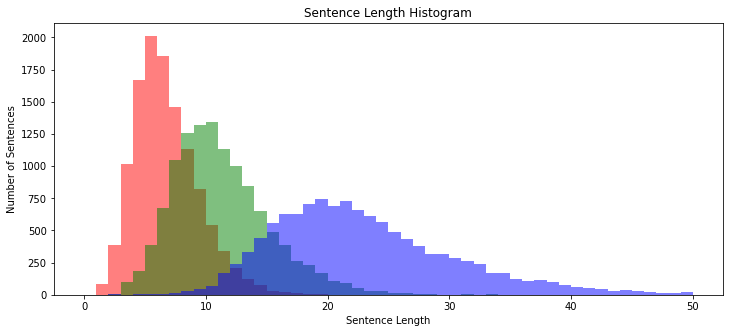

In [16]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

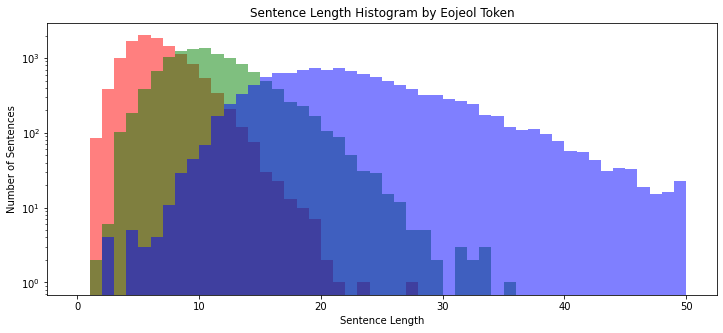

In [17]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [18]:
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 27
어절 최소길이: 1
어절 평균길이: 6.28
어절 길이 표준편차: 2.67
어절 중간길이: 6.0
제 1 사분위 길이: 4.0
제 3 사분위 길이: 8.0


In [19]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 35
형태소 최소길이: 1
형태소 평균길이: 10.76
형태소 길이 표준편차: 3.96
형태소 중간길이: 10.0
형태소 1/4 퍼센타일 길이: 8.0
형태소 3/4 퍼센타일 길이: 13.0


In [20]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 70
음절 최소길이: 2
음절 평균길이: 22.61
음절 길이 표준편차: 7.66
음절 중간길이: 21.0
음절 1/4 퍼센타일 길이: 17.0
음절 3/4 퍼센타일 길이: 27.0


{'whiskers': [<matplotlib.lines.Line2D at 0x215a3ac3438>,
 'caps': [<matplotlib.lines.Line2D at 0x215a3ac39b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x215a3ac3390>,
 'medians': [<matplotlib.lines.Line2D at 0x215a3ac3f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x215a3b31588>,
 'means': [<matplotlib.lines.Line2D at 0x215a3b31278>,
  <matplotlib.lines.Line2D at 0x215a3b66160>]}

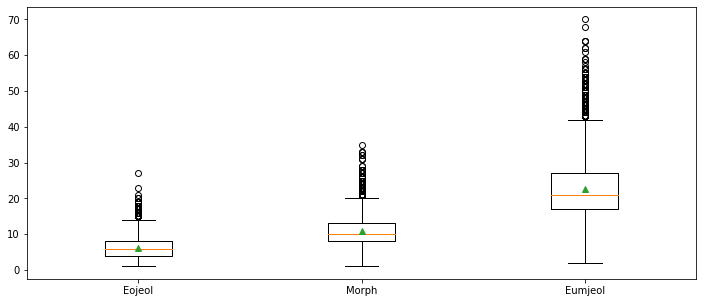

In [21]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)

In [22]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]


In [60]:
for s in query_sentences:
    print(okt.pos(s))


[('12시', 'Number'), ('땡', 'Noun'), ('!', 'Punctuation')]
[('1', 'Number'), ('지망', 'Noun'), ('학교', 'Noun'), ('떨어졌어', 'Verb')]
[('3', 'Number'), ('박', 'Noun'), ('4일', 'Number'), ('놀러', 'Verb'), ('가고', 'Verb'), ('싶다', 'Verb')]
[('3', 'Number'), ('박', 'Noun'), ('4일', 'Number'), ('정도', 'Noun'), ('놀러', 'Verb'), ('가고', 'Verb'), ('싶다', 'Verb')]
[('PPL', 'Alpha'), ('심하네', 'Adjective')]
[('SD', 'Alpha'), ('카드', 'Noun'), ('망가졌어', 'Verb')]
[('SD', 'Alpha'), ('카드', 'Noun'), ('안', 'VerbPrefix'), ('돼', 'Verb')]
[('SNS', 'Alpha'), ('맞팔', 'Noun'), ('왜', 'Noun'), ('안', 'VerbPrefix'), ('하지', 'Verb'), ('ㅠㅠ', 'KoreanParticle')]
[('SNS', 'Alpha'), ('시간', 'Noun'), ('낭비', 'Noun'), ('인', 'Josa'), ('거', 'Noun'), ('아는데', 'Verb'), ('매일', 'Noun'), ('하는', 'Verb'), ('중', 'Noun')]
[('SNS', 'Alpha'), ('시간', 'Noun'), ('낭비', 'Noun'), ('인데', 'Josa'), ('자꾸', 'Noun'), ('보게', 'Verb'), ('됨', 'Verb')]
[('SNS', 'Alpha'), ('보면', 'Verb'), ('나', 'Noun'), ('만', 'Josa'), ('빼고', 'Verb'), ('다', 'Adverb'), ('행복', 'Noun'), ('해보여', 'Ver

[('결혼', 'Noun'), ('하는데', 'Verb'), ('돈', 'Noun'), ('얼마나', 'Noun'), ('들까', 'Verb')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('좋아', 'Adjective'), ('?', 'Punctuation')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('좋을까', 'Adjective')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('행복할까', 'Adjective'), ('?', 'Punctuation')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('행복해', 'Adjective'), ('?', 'Punctuation')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('행복해질', 'Adjective'), ('까', 'Verb'), ('?', 'Punctuation')]
[('결혼', 'Noun'), ('할까', 'Verb')]
[('결혼', 'Noun'), ('해도', 'Verb'), ('되나', 'Verb')]
[('결혼', 'Noun'), ('해도', 'Verb'), ('될까', 'Verb')]
[('결혼', 'Noun'), ('해야', 'Verb'), ('하나', 'Noun')]
[('경쟁', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('치열해', 'Adjective')]
[('계속', 'Noun'), ('공부', 'Noun'), ('해도', 'Verb'), ('될까', 'Verb')]
[('계속', 'Noun'), ('도전', 'Noun'), ('하는', 'Verb'), ('거', 'Noun'), ('귀찮아', 'Adjective')]
[('계속', 'Noun'), ('방학', 'Noun'), ('이면', 'Noun'), ('좋을텐데', 'Adjective')]
[('계속', 'Noun'), ('보고', 'Noun'), ('싶어', 'Verb')]
[('계속', 'Noun')

[('기력', 'Noun'), ('이', 'Josa'), ('없어', 'Adjective')]
[('기름값', 'Noun'), ('올랐어', 'Verb'), ('.', 'Punctuation')]
[('기본', 'Noun'), ('이', 'Josa'), ('뭔', 'Modifier'), ('지도', 'Noun'), ('모르는', 'Verb'), ('것', 'Noun'), ('같아', 'Adjective'), ('.', 'Punctuation')]
[('기본', 'Noun'), ('이', 'Josa'), ('안', 'Noun'), ('되어', 'Verb'), ('있어', 'Adjective')]
[('기부', 'Noun'), ('좀', 'Noun'), ('했어요', 'Verb')]
[('기부', 'Noun'), ('했어', 'Verb')]
[('기분', 'Noun'), ('꿀꿀해', 'Adjective')]
[('기분', 'Noun'), ('나쁜', 'Adjective'), ('농담', 'Noun'), ('을', 'Josa'), ('계속', 'Noun'), ('하고', 'Josa'), ('있어', 'Adjective')]
[('기분', 'Noun'), ('울적해서', 'Adjective'), ('좀', 'Noun'), ('걷고', 'Verb'), ('있어', 'Adjective')]
[('기분', 'Noun'), ('전환', 'Noun'), ('하고', 'Verb'), ('싶어', 'Verb')]
[('기분', 'Noun'), ('전환', 'Noun'), ('이', 'Josa'), ('필요해', 'Adjective')]
[('기분', 'Noun'), ('이', 'Josa'), ('그', 'Noun'), ('지', 'Josa'), ('같아', 'Adjective')]
[('기분', 'Noun'), ('이', 'Josa'), ('더러워', 'Adjective')]
[('기분', 'Noun'), ('이', 'Josa'), ('묘', 'Noun'), ('해', 'Ver

[('나', 'Noun'), ('혼자', 'Noun'), ('여행', 'Noun'), ('왔는데', 'Verb'), ('괜찮네', 'Adjective')]
[('나', 'Noun'), ('혼자', 'Noun'), ('서', 'Josa'), ('축구', 'Noun'), ('본다', 'Verb')]
[('나', 'Noun'), ('화장', 'Noun'), ('을', 'Josa'), ('너무', 'Adverb'), ('못', 'VerbPrefix'), ('해', 'Verb')]
[('나', 'Noun'), ('화장', 'Noun'), ('이', 'Josa'), ('잘', 'Verb'), ('안', 'VerbPrefix'), ('돼', 'Verb')]
[('나', 'Noun'), ('회사', 'Noun'), ('에서', 'Josa'), ('인정받고', 'Verb'), ('싶어', 'Verb')]
[('나가기도', 'Verb'), ('귀찮아', 'Adjective')]
[('나', 'Noun'), ('는', 'Josa'), ('그냥', 'Modifier'), ('저', 'Noun'), ('냥', 'Josa'), ('사는', 'Verb'), ('거', 'Noun'), ('같아', 'Adjective')]
[('나', 'Noun'), ('는', 'Josa'), ('기분', 'Noun'), ('나쁜데', 'Adjective'), ('농담', 'Noun'), ('이라고', 'Josa'), ('계속', 'Noun'), ('해', 'Verb')]
[('나', 'Noun'), ('는', 'Josa'), ('나약한', 'Adjective'), ('존재', 'Noun')]
[('나', 'Noun'), ('는', 'Josa'), ('누구', 'Noun'), ('인가', 'Josa')]
[('나', 'Noun'), ('는', 'Josa'), ('모자란', 'Verb'), ('사람인', 'Noun'), ('거', 'Noun'), ('같아', 'Adjective')]
[('나', 'Noun'

[('남자친구', 'Noun'), ('랑', 'Josa'), ('봉사활동', 'Noun'), ('해보려고', 'Verb')]
[('남자친구', 'Noun'), ('랑', 'Josa'), ('종교', 'Noun'), ('문제', 'Noun'), ('로', 'Josa'), ('다툼', 'Noun')]
[('남자친구', 'Noun'), ('랑', 'Josa'), ('종교', 'Noun'), ('가', 'Josa'), ('달라', 'Noun')]
[('남자친구', 'Noun'), ('한테', 'Josa'), ('질린', 'Verb'), ('거', 'Noun'), ('같아', 'Adjective')]
[('남친', 'Noun'), ('SNS', 'Alpha'), ('에', 'Josa'), ('내', 'Noun'), ('사진', 'Noun'), ('없어', 'Adjective')]
[('남친', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('살찐', 'Noun'), ('듯', 'Noun')]
[('남친', 'Noun'), ('보여줄까', 'Verb')]
[('남친', 'Noun'), ('생일', 'Noun'), ('선물', 'Noun'), ('뭘', 'Noun'), ('주면', 'Verb'), ('좋을까', 'Adjective')]
[('남친', 'Noun'), ('승진', 'Noun'), ('선물', 'Noun'), ('추천', 'Noun')]
[('남친', 'Noun'), ('어디서', 'Adverb'), ('만나', 'Verb')]
[('남친', 'Noun'), ('프로필', 'Noun'), ('에', 'Josa'), ('내', 'Noun'), ('사진', 'Noun'), ('왜', 'Noun'), ('안', 'VerbPrefix'), ('올릴까', 'Verb')]
[('남친', 'Noun'), ('프사', 'Noun'), ('에', 'Josa'), ('내', 'Noun'), ('사진', 'Noun'), ('없어', 'Adjective'

[('내일', 'Noun'), ('일찍', 'Noun'), ('일어나야', 'Verb'), ('돼', 'Verb')]
[('내일', 'Noun'), ('친구', 'Noun'), ('랑', 'Josa'), ('놀까', 'Verb'), ('?', 'Punctuation')]
[('내일', 'Noun'), ('클스', 'Noun'), ('마스', 'Noun'), ('이브', 'Noun'), ('네', 'Josa'), ('.', 'Punctuation')]
[('내일', 'Noun'), ('하루', 'Noun'), ('종일', 'Noun'), ('바빠', 'Adjective')]
[('내일', 'Noun'), ('은', 'Josa'), ('기다리던', 'Verb'), ('소풍', 'Noun'), ('간다', 'Noun')]
[('내일', 'Noun'), ('은', 'Josa'), ('비', 'Noun'), ('왔으면', 'Verb'), ('좋겠다', 'Adjective'), ('.', 'Punctuation')]
[('내일', 'Noun'), ('은', 'Josa'), ('친구', 'Noun'), ('들', 'Suffix'), ('랑', 'Josa'), ('놀까', 'Verb'), ('?', 'Punctuation')]
[('내일', 'Noun'), ('이', 'Josa'), ('기대', 'Noun'), ('돼', 'Verb')]
[('내', 'Determiner'), ('일', 'Modifier'), ('이면', 'Noun'), ('크리스마스', 'Noun'), ('이브', 'Noun'), ('네', 'Josa'), ('.', 'Punctuation')]
[('내장', 'Noun'), ('비만', 'Noun')]
[('낼', 'Noun'), ('데이트', 'Noun'), ('하기로', 'Verb'), ('했는데', 'Verb'), ('날씨', 'Noun'), ('좋았으면', 'Adjective')]
[('낼', 'Noun'), ('바쁘넹', 'Noun')]
[('냄

[('다른', 'Noun'), ('사람', 'Noun'), ('의', 'Josa'), ('시선', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('신경', 'Noun'), ('쓰여', 'Verb')]
[('다른', 'Noun'), ('생각', 'Noun'), ('을', 'Josa'), ('하는', 'Verb'), ('사람', 'Noun'), ('이', 'Josa'), ('많다', 'Adjective'), ('.', 'Punctuation')]
[('다른', 'Noun'), ('학과', 'Noun'), ('간다', 'Noun')]
[('다리', 'Noun'), ('꼬', 'Noun'), ('면', 'Josa'), ('안되는데', 'Adjective'), ('습관', 'Noun'), ('안', 'VerbPrefix'), ('고쳐져', 'Verb')]
[('다리', 'Noun'), ('떠는거', 'Verb'), ('말', 'Noun'), ('들음', 'Verb')]
[('다리', 'Noun'), ('떠는거', 'Verb'), ('지적', 'Noun'), ('받았어', 'Verb')]
[('다리', 'Noun'), ('떨면', 'Verb'), ('안', 'Noun'), ('좋아', 'Adjective'), ('?', 'Punctuation')]
[('다리', 'Noun'), ('떨면', 'Verb'), ('진짜', 'Noun'), ('복', 'Noun'), ('나', 'Josa'), ('가나', 'Noun'), ('?', 'Punctuation')]
[('다리', 'Noun'), ('가', 'Josa'), ('덜덜', 'Noun'), ('떨려', 'Verb')]
[('다리', 'Noun'), ('가', 'Josa'), ('부은', 'Adjective'), ('거', 'Noun'), ('같아', 'Adjective')]
[('다리', 'Noun'), ('가', 'Josa'), ('퉁퉁', 'Noun'), ('부었어', 'Adjective'

[('동호회', 'Noun'), ('가야', 'Noun'), ('지', 'Josa')]
[('동호회', 'Noun'), ('나가기', 'Verb'), ('귀찮아', 'Adjective')]
[('동호회', 'Noun'), ('나가야', 'Noun'), ('하나', 'Noun')]
[('동호회', 'Noun'), ('나가지', 'Verb'), ('말까', 'Verb')]
[('동호회', 'Noun'), ('약속', 'Noun'), ('있어', 'Adjective'), ('.', 'Punctuation')]
[('동호회', 'Noun'), ('재미', 'Noun'), ('없어졌어', 'Verb')]
[('되게', 'Adverb'), ('건조하네', 'Adjective')]
[('되고', 'Verb'), ('싶은', 'Verb'), ('게', 'Noun'), ('두', 'Noun'), ('개야', 'Verb')]
[('되고', 'Verb'), ('싶은', 'Verb'), ('게', 'Noun'), ('없어', 'Adjective')]
[('되는', 'Verb'), ('일이', 'Modifier'), ('하나', 'Noun'), ('도', 'Josa'), ('없네', 'Adjective')]
[('두', 'Noun'), ('사람', 'Noun'), ('만', 'Josa'), ('좋으면', 'Adjective'), ('되는줄', 'Verb'), ('알았는데', 'Verb'), ('아니었나', 'Adjective'), ('봐', 'Verb')]
[('두고', 'Verb'), ('봐', 'Verb')]
[('둔한', 'Adjective'), ('편', 'Noun'), ('인데', 'Josa'), ('이', 'Determiner'), ('것', 'Noun'), ('만', 'Josa'), ('예민해', 'Adjective')]
[('둘', 'Noun'), ('이', 'Josa'), ('사귀는', 'Verb'), ('거', 'Noun'), ('같', 'Adjective'), (

[('맘속', 'Noun'), ('으로', 'Josa'), ('조금씩', 'Adverb'), ('정리', 'Noun'), ('가', 'Josa'), ('돼가네', 'Verb')]
[('맛있는', 'Adjective'), ('거', 'Noun'), ('먹고', 'Verb'), ('싶은데', 'Verb'), ('살', 'Noun'), ('찔까봐', 'Verb'), ('걱정', 'Noun'), ('돼', 'Verb')]
[('맛있는', 'Adjective'), ('냄새', 'Noun'), ('나', 'Josa')]
[('맛집', 'Noun'), ('가고', 'Verb'), ('싶어', 'Verb')]
[('맛집', 'Noun'), ('다녀왔어', 'Verb')]
[('맛집', 'Noun'), ('갈까', 'Verb')]
[('망고', 'Noun'), ('빙수', 'Noun'), ('맛있다', 'Adjective')]
[('맞는', 'Verb'), ('결정', 'Noun'), ('을', 'Josa'), ('한거겠지', 'Verb'), ('?', 'Punctuation')]
[('맞는', 'Verb'), ('선택', 'Noun'), ('일까', 'Verb')]
[('맞춤법', 'Noun'), ('많이', 'Adverb'), ('틀리는', 'Verb'), ('사람', 'Noun')]
[('맞춤법', 'Noun'), ('자꾸', 'Noun'), ('틀리는', 'Verb'), ('사람', 'Noun')]
[('맞춤법', 'Noun'), ('을', 'Josa'), ('자꾸', 'Noun'), ('틀리는', 'Verb'), ('남친', 'Noun'), ('깬다', 'Verb')]
[('매운', 'Adjective'), ('국물', 'Noun'), ('떡볶이', 'Noun'), ('먹고', 'Verb'), ('싶다', 'Verb')]
[('매운', 'Adjective'), ('닭발', 'Noun'), ('먹고', 'Verb'), ('싶다', 'Verb'), ('.', 'Punct

[('문화센터', 'Noun'), ('가야', 'Noun'), ('지', 'Josa')]
[('문화센터', 'Noun'), ('라도', 'Josa'), ('가야겠다', 'Verb'), ('.', 'Punctuation')]
[('물', 'Noun'), ('끓여서', 'Verb'), ('차', 'Noun'), ('마셔야지', 'Verb')]
[('물', 'Noun'), ('끓여야지', 'Verb')]
[('물', 'Noun'), ('너무', 'Adverb'), ('차가워', 'Adjective')]
[('물', 'Noun'), ('마셔야지', 'Verb')]
[('물', 'Noun'), ('마실라', 'Verb'), ('구', 'Noun')]
[('물', 'Noun'), ('많이', 'Adverb'), ('마셔야', 'Verb'), ('돼', 'Verb')]
[('물', 'Noun'), ('많이', 'Adverb'), ('마시라고', 'Verb'), ('했는데', 'Verb')]
[('물', 'Noun'), ('자주', 'Noun'), ('마셔야지', 'Verb')]
[('물', 'Noun'), ('좋은데', 'Adjective'), ('어디', 'Noun'), ('야', 'Josa'), ('?', 'Punctuation')]
[('물', 'Noun'), ('주문', 'Noun'), ('해야지', 'Verb')]
[('물', 'Noun'), ('차가워', 'Adjective')]
[('물', 'Noun'), ('한', 'Verb'), ('잔', 'Noun'), ('마시기', 'Noun')]
[('물가', 'Noun'), ('왤케', 'Noun'), ('비쌈', 'Adjective')]
[('물가', 'Noun'), ('가', 'Josa'), ('왜', 'Noun'), ('이렇게', 'Adverb'), ('비쌈', 'Adjective')]
[('물건', 'Noun'), ('사는것도', 'Verb'), ('힘드네', 'Adjective')]
[('물', 'Noun'

[('배불러서', 'Adjective'), ('배', 'Noun'), ('터질', 'Verb'), ('듯', 'Noun')]
[('배송', 'Noun'), ('중이', 'Noun'), ('래', 'Josa')]
[('배', 'Noun'), ('에서', 'Josa'), ('꾸룩꾸룩', 'Noun'), ('소리', 'Noun'), ('남', 'Noun')]
[('배', 'Noun'), ('에서', 'Josa'), ('소리', 'Noun'), ('남', 'Noun')]
[('배워도', 'Verb'), ('모르는', 'Verb'), ('게', 'Noun'), ('너무', 'Adverb'), ('많아', 'Adjective')]
[('배터리', 'Noun'), ('간당간당', 'Adverb')]
[('백조', 'Noun'), ('됐어', 'Verb')]
[('뱃살', 'Noun'), ('나온', 'Verb'), ('거', 'Noun'), ('같아', 'Adjective')]
[('뱃살', 'Noun'), ('나와', 'Verb')]
[('뱃살', 'Noun'), ('빵빵', 'Noun')]
[('뱃살', 'Noun'), ('이', 'Josa'), ('잡혀', 'Verb')]
[('버려야', 'Verb'), ('되는데', 'Verb'), ('..', 'Punctuation')]
[('버리기', 'Verb'), ('아까운데', 'Adjective'), ('리폼', 'Noun'), ('해볼까', 'Verb')]
[('버릴', 'Verb'), ('건', 'Noun'), ('버려야', 'Verb'), ('겠지', 'Verb')]
[('버림', 'Verb'), ('받은', 'Verb'), ('느낌', 'Noun')]
[('버스', 'Noun'), ('기다릴', 'Verb'), ('때', 'Noun'), ('가면', 'Noun'), ('자꾸', 'Noun'), ('생각나', 'Verb')]
[('버스', 'Noun'), ('끊겼다', 'Verb')]
[('버스', 'Noun'), 

[('비트코인', 'Noun'), ('날림', 'Noun')]
[('비트코인', 'Noun'), ('망함', 'Adjective'), ('한강', 'Noun'), ('가자', 'Verb')]
[('비트코인', 'Noun'), ('ㅜㅜ', 'KoreanParticle')]
[('비행기', 'Noun'), ('타러', 'Verb'), ('간다', 'Noun'), ('!', 'Punctuation')]
[('비행기', 'Noun'), ('타러', 'Verb'), ('공항', 'Noun'), ('간다', 'Noun')]
[('비행기표', 'Noun'), ('가', 'Josa'), ('너무', 'Adverb'), ('비싸', 'Adjective')]
[('비행기표', 'Noun'), ('가', 'Josa'), ('왜', 'Noun'), ('이렇게', 'Adverb'), ('비싸', 'Adjective')]
[('빙빙', 'Noun'), ('돌려서', 'Verb'), ('말', 'Noun'), ('하지', 'Verb'), ('말고', 'Josa'), ('다이렉트', 'Noun'), ('로', 'Josa'), ('말', 'Noun'), ('했으면', 'Verb')]
[('빙수', 'Noun'), ('맛있다', 'Adjective')]
[('빚', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('죽', 'Noun'), ('을', 'Josa'), ('것', 'Noun'), ('같아', 'Adjective')]
[('빚', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('많아', 'Adjective')]
[('빠떼리', 'Noun'), ('나감', 'Verb')]
[('빡빡', 'Noun'), ('한', 'Josa'), ('일상', 'Noun')]
[('빨래', 'Noun'), ('끝', 'Noun')]
[('빨래', 'Noun'), ('다', 'Adverb'), ('했다', 'Verb'), ('.', 'Punctuati

[('서핑', 'Noun'), ('하러', 'Verb'), ('가야', 'Noun'), ('지', 'Josa')]
[('선', 'Noun'), ('들어왔어', 'Verb')]
[('선', 'Noun'), ('많이', 'Adverb'), ('볼거', 'Verb'), ('같아', 'Adjective')]
[('선', 'Noun'), ('볼까', 'Verb'), ('?', 'Punctuation')]
[('선물', 'Noun'), ('주세요', 'Verb')]
[('선물', 'Noun'), ('로', 'Josa'), ('인형', 'Noun'), ('받았어', 'Verb')]
[('선물', 'Noun'), ('받고', 'Verb'), ('싶어', 'Verb')]
[('선배', 'Noun'), ('가', 'Josa'), ('선배', 'Noun'), ('같지', 'Adjective'), ('않아', 'Verb')]
[('선배', 'Noun'), ('가', 'Josa'), ('이상해', 'Adjective')]
[('선생님', 'Noun'), ('좋아해', 'Adjective')]
[('선생님', 'Noun'), ('이', 'Josa'), ('나', 'Noun'), ('만', 'Josa'), ('뭐라고', 'Verb'), ('해', 'Noun')]
[('선생님', 'Noun'), ('이', 'Josa'), ('나', 'Noun'), ('만', 'Josa'), ('미워해', 'Adjective')]
[('선생님', 'Noun'), ('이', 'Josa'), ('나', 'Noun'), ('한테', 'Josa'), ('왜', 'Noun'), ('그럴까', 'Adjective'), ('?', 'Punctuation')]
[('선생님', 'Noun'), ('이', 'Josa'), ('좋아', 'Adjective')]
[('선생님', 'Noun'), ('이', 'Josa'), ('차별', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('같아', 'Adjec

[('쉬운', 'Adjective'), ('게', 'Noun'), ('없네', 'Adjective')]
[('쉬운', 'Adjective'), ('게', 'Noun'), ('하나', 'Noun'), ('도', 'Josa'), ('없네', 'Adjective')]
[('쉬운', 'Adjective'), ('게', 'Noun'), ('하나', 'Noun'), ('도', 'Josa'), ('없는', 'Adjective'), ('듯', 'Noun')]
[('쉽게', 'Verb'), ('상처', 'Noun'), ('받는', 'Verb'), ('거', 'Noun'), ('같아', 'Adjective')]
[('슈퍼문', 'Noun'), ('이라', 'Josa'), ('더니', 'Noun'), ('예쁘다', 'Adjective'), ('.', 'Punctuation')]
[('슈퍼문', 'Noun'), ('이야', 'Josa')]
[('스노우보드', 'Noun'), ('배우러', 'Verb'), ('갈거댜', 'Noun')]
[('스노클링', 'Noun'), ('재미있을까', 'Adjective'), ('?', 'Punctuation')]
[('스노클링', 'Noun'), ('해볼까', 'Verb'), ('?', 'Punctuation')]
[('스케일링', 'Noun'), ('하기', 'Verb'), ('귀찮아', 'Adjective')]
[('스케일링', 'Noun'), ('하러', 'Verb'), ('가야', 'Noun'), ('지', 'Josa')]
[('스쿼트', 'Noun'), ('하면', 'Verb'), ('무릎', 'Noun'), ('에', 'Josa'), ('안좋겠지', 'Adjective'), ('?', 'Punctuation')]
[('스키', 'Noun'), ('강습', 'Noun'), ('받아야', 'Verb'), ('될까', 'Verb'), ('?', 'Punctuation')]
[('스키', 'Noun'), ('배워', 'Verb'), ('보고'

[('아무', 'Modifier'), ('것', 'Noun'), ('도', 'Josa'), ('하고', 'Verb'), ('싶지', 'Verb'), ('않으면서', 'Verb'), ('아무', 'Modifier'), ('거나', 'Noun'), ('하고', 'Verb'), ('싶어', 'Verb')]
[('아무', 'Modifier'), ('것', 'Noun'), ('도', 'Josa'), ('하기가', 'Verb'), ('싫어', 'Adjective')]
[('아무', 'Noun'), ('도', 'Josa'), ('모르게', 'Verb'), ('있고', 'Adjective'), ('싶어', 'Verb')]
[('아무', 'Noun'), ('도', 'Josa'), ('안', 'Noun'), ('놀아줘', 'Verb')]
[('아무', 'Noun'), ('도', 'Josa'), ('없어', 'Adjective')]
[('아무래도', 'Adverb'), ('속', 'Noun'), ('은', 'Josa'), ('거', 'Noun'), ('같아', 'Adjective')]
[('아무래도', 'Adverb'), ('우울증', 'Noun'), ('걸린', 'Verb'), ('거', 'Noun'), ('같아', 'Adjective')]
[('아무래도', 'Adverb'), ('전공', 'Noun'), ('을', 'Josa'), ('잘못', 'Noun'), ('골랐나', 'Verb'), ('봐', 'Verb')]
[('아무래도', 'Adverb'), ('탈모', 'Noun'), ('왔나', 'Verb'), ('봐', 'Verb')]
[('아무리', 'Adverb'), ('열심히', 'Adverb'), ('해도', 'Noun'), ('선천', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('건', 'Noun'), ('못', 'Noun'), ('따라가겠지', 'Verb'), ('?', 'Punctuation')]
[('아무리', 'Adverb'), 

[('어떻게', 'Adjective'), ('하면', 'Verb'), ('좋을까', 'Adjective'), ('?', 'Punctuation')]
[('어떻게', 'Adjective'), ('하면', 'Verb'), ('호감', 'Noun'), ('형', 'Suffix'), ('이', 'Josa'), ('될까', 'Verb')]
[('어떻게', 'Adjective'), ('화해', 'Noun'), ('하지', 'Verb')]
[('어떻게', 'Adjective'), ('해', 'Noun'), ('늦잠', 'Noun'), ('잤어', 'Verb')]
[('어려', 'Verb'), ('보이', 'Noun'), ('고', 'Josa'), ('싶어', 'Verb')]
[('어려지고', 'Verb'), ('싶어', 'Verb')]
[('어렸을', 'Verb'), ('때', 'Noun'), ('공부', 'Noun'), ('좀', 'Noun'), ('할', 'Verb'), ('걸', 'Noun')]
[('어렸을', 'Verb'), ('때', 'Noun'), ('공부', 'Noun'), ('할껄', 'Noun')]
[('어렸을', 'Verb'), ('때', 'Noun'), ('는', 'Josa'), ('공부', 'Noun'), ('하기', 'Verb'), ('싫었는데', 'Adjective'), ('지금', 'Noun'), ('은', 'Josa'), ('하고', 'Verb'), ('싶네', 'Verb')]
[('어렸을', 'Verb'), ('때', 'Noun'), ('는', 'Josa'), ('비슷했던', 'Adjective'), ('거', 'Noun'), ('같은데', 'Adjective')]
[('어렸을', 'Verb'), ('때', 'Noun'), ('로', 'Josa'), ('돌아가고', 'Verb'), ('싶어', 'Verb')]
[('어른', 'Noun'), ('이', 'Josa'), ('된다는', 'Verb'), ('건', 'Noun'), ('뭘', 'Noun

[('연애', 'Noun'), ('했더니', 'Verb'), ('살찐', 'Noun'), ('듯', 'Noun')]
[('연예인', 'Noun'), ('걱정', 'Noun'), ('이', 'Josa'), ('제일', 'Noun'), ('쓸데', 'Verb'), ('없어', 'Adjective')]
[('연예인', 'Noun'), ('되고', 'Verb'), ('싶어', 'Verb')]
[('연예인', 'Noun'), ('되는', 'Verb'), ('방법', 'Noun')]
[('연예인', 'Noun'), ('되면', 'Verb'), ('피곤하겠지', 'Adjective'), ('?', 'Punctuation')]
[('연예인', 'Noun'), ('도', 'Josa'), ('힘든게', 'Adjective'), ('있겠지', 'Adjective'), ('?', 'Punctuation')]
[('연예인', 'Noun'), ('도', 'Josa'), ('힘들겠다', 'Adjective'), ('.', 'Punctuation')]
[('연예인', 'Noun'), ('도', 'Josa'), ('힘들겠지', 'Adjective'), ('?', 'Punctuation')]
[('연일', 'Noun'), ('최고', 'Noun'), ('몸무게', 'Noun'), ('갱신', 'Noun'), ('하네', 'Verb'), ('.', 'Punctuation')]
[('열나고', 'Verb'), ('아파', 'Adjective')]
[('열쇠', 'Noun'), ('두고', 'Verb'), ('왔다', 'Verb')]
[('열쇠', 'Noun'), ('안가지고', 'Verb'), ('왔다', 'Verb')]
[('열심히', 'Adverb'), ('공부', 'Noun'), ('해야지', 'Verb')]
[('열심히', 'Adverb'), ('한', 'Verb'), ('거', 'Noun'), ('같은데', 'Adjective')]
[('열심히', 'Adverb'), ('한', 'Ver

[('왜', 'Noun'), ('교양', 'Noun'), ('도', 'Josa'), ('들어야', 'Verb'), ('해', 'Noun')]
[('왜', 'Noun'), ('그러는지', 'Adjective'), ('모르겠어', 'Verb')]
[('왜', 'Noun'), ('나를', 'Verb'), ('의심', 'Noun'), ('하지', 'Verb')]
[('왜', 'Noun'), ('나', 'Noun'), ('만', 'Josa'), ('시키지', 'Verb')]
[('왜', 'Noun'), ('나', 'Noun'), ('한테', 'Josa'), ('피해', 'Noun'), ('를', 'Josa'), ('주냐고', 'Verb')]
[('왜', 'Noun'), ('내', 'Noun'), ('가', 'Josa'), ('해야', 'Verb'), ('하지', 'Verb'), ('?', 'Punctuation')]
[('왜', 'Noun'), ('답장', 'Noun'), ('을', 'Josa'), ('안', 'VerbPrefix'), ('하지', 'Verb')]
[('왜', 'Noun'), ('돈', 'Noun'), ('이', 'Josa'), ('없지', 'Adjective')]
[('왜', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('나', 'Noun'), ('만', 'Josa'), ('시키냐고', 'Verb')]
[('왜', 'Noun'), ('말', 'Noun'), ('을', 'Josa'), ('못', 'VerbPrefix'), ('해', 'Verb'), ('말', 'Noun'), ('을', 'Josa'), ('못', 'VerbPrefix'), ('하냐구', 'Verb')]
[('왜', 'Noun'), ('말', 'Noun'), ('을', 'Josa'), ('이해', 'Noun'), ('를', 'Josa'), ('못', 'VerbPrefix'), ('하냐구', 'Verb')]
[('왜', 'Noun'), ('맨날', 'Adverb'

[('의욕', 'Noun'), ('이', 'Josa'), ('없어', 'Adjective')]
[('의욕', 'Noun'), ('이', 'Josa'), ('일도', 'Noun'), ('없어', 'Adjective')]
[('의욕', 'Noun'), ('이', 'Josa'), ('하나', 'Noun'), ('도', 'Josa'), ('없다', 'Adjective')]
[('의자', 'Noun'), ('너무', 'Adverb'), ('불편해', 'Adjective')]
[('의자', 'Noun'), ('가', 'Josa'), ('불편해', 'Adjective')]
[('이', 'Noun'), ('기분', 'Noun'), ('은', 'Josa'), ('뭘', 'Noun'), ('까', 'Verb')]
[('이', 'Noun'), ('기회', 'Noun'), ('잡고', 'Noun'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('이', 'Noun'), ('기회', 'Noun'), ('는', 'Josa'), ('내꺼야', 'Verb')]
[('이', 'Noun'), ('길이', 'Noun'), ('나', 'Noun'), ('에게', 'Josa'), ('맞는걸', 'Verb'), ('까', 'Verb')]
[('이', 'Noun'), ('길이', 'Noun'), ('맞을까', 'Verb'), ('?', 'Punctuation')]
[('이', 'Noun'), ('나이', 'Noun'), ('에', 'Josa'), ('모르는게', 'Verb'), ('왜', 'Noun'), ('이렇게', 'Adverb'), ('많지', 'Adjective')]
[('이', 'Noun'), ('노래', 'Noun'), ('는', 'Josa'), ('저음', 'Noun'), ('이', 'Josa'), ('좋아', 'Adjective')]
[('이', 'Noun'), ('놈', 'Noun'), ('의', 'Josa'), ('신용카드', 'Noun'), ('다', '

[('일어났더니', 'Verb'), ('목', 'Noun'), ('이', 'Josa'), ('잠겼어', 'Verb')]
[('일', 'Noun'), ('에', 'Josa'), ('적응하면', 'Adjective'), ('좀', 'Noun'), ('더', 'Noun'), ('잘', 'Verb'), ('할', 'Verb'), ('수', 'Noun'), ('있을까', 'Adjective')]
[('일요일', 'Noun'), ('에', 'Josa'), ('교회', 'Noun'), ('끝나고', 'Verb'), ('어디', 'Noun'), ('가고', 'Verb'), ('싶어', 'Verb'), ('.', 'Punctuation')]
[('일요일', 'Noun'), ('에', 'Josa'), ('교회', 'Noun'), ('만', 'Josa'), ('가', 'Verb')]
[('일요일', 'Noun'), ('에', 'Josa'), ('데이트', 'Noun'), ('해야지', 'Verb'), ('!', 'Punctuation')]
[('일', 'Noun'), ('은', 'Josa'), ('많이', 'Adverb'), ('하는데', 'Verb'), ('월급', 'Noun'), ('은', 'Josa'), ('너무', 'Adverb'), ('적어', 'Verb')]
[('일', 'Noun'), ('은', 'Josa'), ('원래', 'Noun'), ('혼나면서', 'Verb'), ('배워', 'Verb'), ('?', 'Punctuation')]
[('일', 'Noun'), ('을', 'Josa'), ('거지같이해', 'Adjective')]
[('일', 'Noun'), ('을', 'Josa'), ('나', 'Noun'), ('만', 'Josa'), ('해', 'Noun')]
[('일', 'Noun'), ('을', 'Josa'), ('못', 'VerbPrefix'), ('하는', 'Verb'), ('동료', 'Noun'), ('가', 'Josa'), ('있는데', 'Adjec

[('재테크', 'Noun'), ('하는', 'Verb'), ('방법', 'Noun'), ('알려줘', 'Verb')]
[('저', 'Noun'), ('사람', 'Noun'), ('이', 'Josa'), ('왜', 'Noun'), ('자꾸', 'Noun'), ('볼까', 'Verb'), ('?', 'Punctuation')]
[('저', 'Noun'), ('좀', 'Noun'), ('웃게', 'Verb'), ('해주세요', 'Verb')]
[('저금', 'Noun'), ('통', 'Noun'), ('깰까', 'Verb')]
[('저금', 'Noun'), ('통', 'Noun'), ('털까', 'Verb')]
[('저기', 'Noun')]
[('저녁', 'Noun'), ('메뉴', 'Noun'), ('뭐', 'Noun'), ('먹을까', 'Verb')]
[('저녁', 'Noun'), ('메뉴', 'Noun'), ('좀', 'Noun'), ('골라줘', 'Verb')]
[('저녁', 'Noun'), ('메뉴', 'Noun'), ('추천', 'Noun'), ('해줘', 'Verb')]
[('저녁', 'Noun'), ('뭐', 'Noun'), ('먹지', 'Verb'), ('?', 'Punctuation')]
[('저녁', 'Noun'), ('준비', 'Noun'), ('해', 'Noun'), ('놔야지', 'Verb')]
[('저녁밥', 'Noun'), ('뭐', 'Noun'), ('먹냐', 'Verb'), ('?', 'Punctuation')]
[('저녁', 'Noun'), ('으로', 'Josa'), ('뭐', 'Noun'), ('먹을까', 'Verb')]
[('저녁', 'Noun'), ('해야', 'Verb'), ('되는데', 'Verb'), ('.', 'Punctuation')]
[('저음', 'Noun'), ('멋있어', 'Adjective'), ('!', 'Punctuation')]
[('저주', 'Noun'), ('할거야', 'Verb')]
[('적금'

[('주택', 'Noun'), ('청약', 'Noun'), ('가입', 'Noun')]
[('주택', 'Noun'), ('청약', 'Noun'), ('시작', 'Noun'), ('!', 'Punctuation')]
[('주택', 'Noun'), ('청약', 'Noun'), ('들었어', 'Verb')]
[('주행', 'Noun'), ('연습', 'Noun'), ('끝났어', 'Verb')]
[('죽고', 'Verb'), ('싶다', 'Verb')]
[('죽어도', 'Verb'), ('아무', 'Noun'), ('도', 'Josa'), ('모르겠지', 'Verb')]
[('죽', 'Noun'), ('을', 'Josa'), ('때', 'Noun'), ('까지', 'Josa'), ('함께하고', 'Verb'), ('싶다', 'Verb')]
[('죽', 'Noun'), ('을', 'Josa'), ('때', 'Noun'), ('까지', 'Josa'), ('함께하고', 'Verb'), ('싶은', 'Verb'), ('사람', 'Noun'), ('이', 'Josa'), ('생겼어', 'Verb')]
[('죽을래', 'Verb'), ('?', 'Punctuation')]
[('줄', 'Noun'), ('길거', 'Verb'), ('같아', 'Adjective')]
[('중', 'Noun'), ('2', 'Number'), ('아들', 'Noun'), ('때매', 'Noun'), ('고민', 'Noun'), ('이야', 'Josa')]
[('중', 'Noun'), ('2', 'Number'), ('히스테리', 'Noun'), ('알', 'Noun'), ('아', 'Josa'), ('?', 'Punctuation')]
[('중', 'Noun'), ('2', 'Number'), ('병', 'Noun')]
[('중', 'Noun'), ('2', 'Number'), ('병', 'Noun'), ('이라더니', 'Verb'), ('진짜', 'Noun'), ('속', 'Noun'), ('

[('창업', 'Noun'), ('할까', 'Verb')]
[('창업', 'Noun'), ('이라도', 'Josa'), ('해야', 'Verb'), ('겠지', 'Verb')]
[('창업', 'Noun'), ('하고', 'Josa'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('창업', 'Noun'), ('해도', 'Verb'), ('될까', 'Verb'), ('?', 'Punctuation')]
[('창피해', 'Noun')]
[('책', 'Noun'), ('반납', 'Noun'), ('안햇', 'Noun'), ('다', 'Adverb')]
[('책', 'Noun'), ('보는데', 'Verb'), ('글자', 'Noun'), ('만', 'Josa'), ('들어와', 'Verb')]
[('책', 'Noun'), ('빌려', 'Verb'), ('봐야지', 'Verb')]
[('책', 'Noun'), ('선물', 'Noun'), ('이', 'Josa'), ('제일', 'Noun'), ('나을', 'Verb'), ('듯', 'Noun')]
[('책', 'Noun'), ('선물', 'Noun'), ('해야지', 'Verb')]
[('책', 'Noun'), ('어디', 'Noun'), ('다', 'Josa'), ('팔', 'Noun'), ('아', 'Josa'), ('?', 'Punctuation')]
[('책', 'Noun'), ('좀', 'Noun'), ('읽어야지', 'Verb')]
[('책', 'Noun'), ('팔', 'Noun'), ('수', 'Noun'), ('있는', 'Adjective'), ('곳', 'Noun'), ('알려줘', 'Verb'), ('?', 'Punctuation')]
[('책', 'Noun'), ('만', 'Josa'), ('보면', 'Verb'), ('졸려', 'Verb')]
[('책', 'Noun'), ('만', 'Josa'), ('펴만', 'Verb'), ('잠', 'Noun'), ('와', 'Jo

[('친구', 'Noun'), ('가', 'Josa'), ('많으면', 'Adjective'), ('재미있을', 'Adjective'), ('것', 'Noun'), ('같아', 'Adjective'), ('.', 'Punctuation')]
[('친구', 'Noun'), ('가', 'Josa'), ('배', 'Noun'), ('아플', 'Adjective'), ('정도', 'Noun'), ('로', 'Josa'), ('잘', 'Verb'), ('됐어', 'Verb')]
[('친구', 'Noun'), ('가', 'Josa'), ('소개', 'Noun'), ('해줬는데', 'Verb'), ('이상한', 'Adjective'), ('사람', 'Noun'), ('이었어', 'Verb')]
[('친구', 'Noun'), ('가', 'Josa'), ('소심해', 'Adjective')]
[('친구', 'Noun'), ('가', 'Josa'), ('엄청', 'Adverb'), ('소심해', 'Adjective')]
[('친구', 'Noun'), ('가', 'Josa'), ('없어', 'Adjective')]
[('친구', 'Noun'), ('가', 'Josa'), ('예뻐서', 'Adjective'), ('위축', 'Noun'), ('돼', 'Verb')]
[('친구', 'Noun'), ('가', 'Josa'), ('이사', 'Noun'), ('하는', 'Verb'), ('거', 'Noun'), ('도와준대', 'Verb')]
[('친구', 'Noun'), ('가', 'Josa'), ('이어', 'Verb'), ('줬는데', 'Verb'), ('안', 'Noun'), ('됐어', 'Verb')]
[('친구', 'Noun'), ('가', 'Josa'), ('자꾸', 'Noun'), ('집착', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('같은데', 'Adjective'), ('뭐라', 'Verb'), ('말', 'Noun'), ('하지', 'V

[('크루즈', 'Noun'), ('여행', 'Noun'), ('하고', 'Verb'), ('싶어', 'Verb')]
[('크루즈', 'Noun'), ('타고', 'Noun'), ('여행', 'Noun'), ('하고', 'Verb'), ('싶어', 'Verb')]
[('크리스마스', 'Noun'), ('에', 'Josa'), ('뭐', 'Noun'), ('하나', 'Noun')]
[('크리스마스', 'Noun'), ('엔', 'Josa'), ('눈', 'Noun'), ('이', 'Josa'), ('올까', 'Verb')]
[('큰일', 'Noun'), ('없이', 'Adverb'), ('살', 'Noun'), ('고', 'Josa'), ('있어', 'Adjective')]
[('클럽', 'Noun'), ('가고', 'Verb'), ('싶은데', 'Verb'), ('말', 'Noun'), ('할까', 'Verb')]
[('클럽', 'Noun'), ('가고', 'Verb'), ('싶은데', 'Verb'), ('말', 'Noun'), ('하고', 'Josa'), ('갈까', 'Verb')]
[('클스마스', 'Noun'), ('에', 'Josa'), ('할', 'Verb'), ('일', 'Noun')]
[('키', 'Noun'), ('왜', 'Noun'), ('안', 'Noun'), ('크지', 'Verb')]
[('키', 'Noun'), ('이제', 'Noun'), ('안', 'Noun'), ('크나', 'Verb')]
[('키', 'Noun'), ('컸으면', 'Verb')]
[('키', 'Noun'), ('가', 'Josa'), ('안', 'Noun'), ('커', 'Verb')]
[('키', 'Noun'), ('가', 'Josa'), ('왜', 'Noun'), ('안', 'Noun'), ('클까', 'Verb')]
[('키', 'Noun'), ('가', 'Josa'), ('조금', 'Noun'), ('만', 'Josa'), ('더', 'Noun'), ('컸으

[('학교', 'Noun'), ('잘', 'Verb'), ('적', 'Noun'), ('을', 'Josa'), ('할', 'Verb'), ('수', 'Noun'), ('있을까', 'Adjective'), ('?', 'Punctuation')]
[('학교', 'Noun'), ('적을하고', 'Verb'), ('잘', 'Verb'), ('다닐', 'Verb'), ('수', 'Noun'), ('있을까', 'Adjective'), ('?', 'Punctuation')]
[('학교', 'Noun'), ('축제', 'Noun'), ('준비', 'Noun'), ('하느라', 'Verb'), ('바빠', 'Adjective')]
[('학교', 'Noun'), ('축제', 'Noun'), ('를', 'Josa'), ('즐겨야지', 'Verb')]
[('학교생활', 'Noun'), ('이', 'Josa'), ('조금', 'Noun'), ('만', 'Josa'), ('더', 'Noun'), ('재밌으면', 'Adjective'), ('좋겠어', 'Adjective')]
[('학교', 'Noun'), ('에서', 'Josa'), ('계속', 'Noun'), ('잠', 'Noun')]
[('학교', 'Noun'), ('에서', 'Josa'), ('계속', 'Noun'), ('잤어', 'Verb')]
[('학교', 'Noun'), ('에서', 'Josa'), ('맞았어', 'Verb')]
[('학교', 'Noun'), ('에서', 'Josa'), ('아싸', 'Exclamation'), ('해도', 'Noun'), ('될까', 'Verb'), ('?', 'Punctuation')]
[('학교폭력', 'Noun'), ('당하고', 'Adjective'), ('있어', 'Adjective')]
[('학벌', 'Noun'), ('이', 'Josa'), ('중요하겠지', 'Adjective'), ('?', 'Punctuation')]
[('학벌', 'Noun'), ('이', 'Josa'), 

[('화장', 'Noun'), ('이', 'Josa'), ('안', 'Noun'), ('받네', 'Verb')]
[('화장품', 'Noun'), ('다', 'Adverb'), ('떨어졌어', 'Verb')]
[('화장품', 'Noun'), ('사고', 'Noun'), ('싶어', 'Verb')]
[('화장품', 'Noun'), ('없어', 'Adjective'), ('사야', 'Verb'), ('돼', 'Verb')]
[('화장품', 'Noun'), ('이', 'Josa'), ('필요해', 'Adjective')]
[('화장', 'Noun'), ('하는', 'Verb'), ('동영상', 'Noun'), ('보는', 'Verb'), ('중', 'Noun')]
[('화장', 'Noun'), ('하니까', 'Verb'), ('어때', 'Adjective'), ('?', 'Punctuation')]
[('화해', 'Noun'), ('어떻게', 'Adjective'), ('해', 'Noun')]
[('확실한', 'Adjective'), ('건', 'Noun'), ('뭘', 'Noun'), ('까', 'Verb'), ('?', 'Punctuation')]
[('환기', 'Noun'), ('좀', 'Noun'), ('해야', 'Verb'), ('할까', 'Verb'), ('?', 'Punctuation')]
[('환기', 'Noun'), ('할까', 'Verb'), ('?', 'Punctuation')]
[('환승', 'Noun'), ('가능', 'Noun'), ('?', 'Punctuation')]
[('환승', 'Noun'), ('이', 'Josa'), ('될까', 'Verb')]
[('환승', 'Noun'), ('할까', 'Verb')]
[('활발한', 'Adjective'), ('성격', 'Noun'), ('갖고', 'Verb'), ('싶다', 'Verb')]
[('황당해', 'Adjective'), ('죽겠다', 'Verb'), ('.', 'Punctuation'

[('4년', 'Number'), ('을', 'Foreign'), ('만난', 'Noun'), ('여친', 'Noun'), ('이', 'Josa'), ('떠났습니다', 'Verb'), ('.', 'Punctuation')]
[('4년', 'Number'), ('을', 'Foreign'), ('만났어도', 'Verb'), (',,', 'Punctuation')]
[('4년', 'Number'), ('을', 'Foreign'), ('엊그제', 'Noun'), ('마무리', 'Noun'), ('했습니다', 'Verb')]
[('4', 'Number'), ('번의', 'Noun'), ('재회', 'Noun'), ('와', 'Josa'), ('4', 'Number'), ('번의', 'Noun'), ('헤어짐', 'Verb')]
[('4월', 'Number'), (',', 'Punctuation'), ('이별', 'Noun'), ('을', 'Josa'), ('말', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]
[('5년', 'Number'), ('10', 'Number'), ('개', 'Noun'), ('월간', 'Noun'), ('연애', 'Noun'), ('.', 'Punctuation'), ('그리고', 'Conjunction'), ('이별', 'Noun'), ('준비', 'Noun'), ('중', 'Noun')]
[('5년', 'Number'), ('동거', 'Noun'), ('후', 'Noun'), ('이별', 'Noun'), ('.', 'Punctuation')]
[('5년', 'Number'), ('사귄', 'Verb'), ('여자친구', 'Noun'), ('와', 'Josa'), ('이별', 'Noun'), ('이네', 'Josa'), ('.', 'Punctuation'), ('조언', 'Noun'), ('부탁', 'Noun'), ('좀', 'Noun'), ('드려', 'Verb')]
[('5년', 'Number')

[('결혼', 'Noun'), ('할', 'Verb'), ('확신', 'Noun'), ('이', 'Josa'), ('안', 'VerbPrefix'), ('선다고', 'Verb'), ('헤어지자', 'Noun'), ('네', 'Josa')]
[('계속', 'Noun'), ('맴돈다', 'Verb'), ('.', 'Punctuation')]
[('계속', 'Noun'), ('생각나는', 'Verb'), ('사람', 'Noun'), ('.', 'Punctuation')]
[('계속', 'Noun'), ('생각난다면', 'Verb'), ('연락', 'Noun'), ('한', 'Verb'), ('번', 'Noun'), ('해봐야겠죠', 'Verb'), ('?', 'Punctuation')]
[('계속', 'Noun'), ('시간', 'Noun'), ('을', 'Josa'), ('갖자는', 'Verb'), ('의미', 'Noun'), ('는', 'Josa'), ('뭔가', 'Noun'), ('?', 'Punctuation')]
[('계속', 'Noun'), ('꿈', 'Noun'), ('에', 'Josa'), ('나와', 'Verb')]
[('계절', 'Noun'), ('이', 'Josa'), ('바뀌면', 'Verb')]
[('고민', 'Noun'), ('이', 'Josa'), ('되네', 'Verb')]
[('고백', 'Noun'), ('하고', 'Josa'), ('후회', 'Noun'), ('하면', 'Verb'), ('어떡하지', 'Adjective')]
[('고작', 'Noun'), ('그러려고', 'Adjective'), ('날', 'Noun'), ('떠난', 'Verb'), ('건지', 'Verb')]
[('고작', 'Noun'), ('사람', 'Noun'), ('하나', 'Noun'), ('인데', 'Josa')]
[('곧', 'Noun'), ('1년', 'Number'), ('인데', 'Foreign'), ('헤어졌어', 'Verb')]
[('곧', 'N

[('극복', 'Noun'), ('연락', 'Noun'), ('흔들림', 'Verb')]
[('근데', 'Adverb'), ('헤어지고', 'Verb'), ('별로', 'Noun'), ('힘들지', 'Adjective'), ('않은건', 'Verb'), ('왜', 'Noun'), ('그런', 'Modifier'), ('건가', 'Noun'), ('?', 'Punctuation')]
[('글', 'Noun'), ('썼다가', 'Verb'), ('지우게', 'Verb'), ('돼', 'Verb')]
[('글', 'Noun'), ('을', 'Josa'), ('쓰게', 'Verb'), ('되네', 'Verb')]
[('기념일', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('추억', 'Noun')]
[('기다리고', 'Verb'), ('계신', 'Adjective'), ('분들', 'Suffix'), ('.', 'Punctuation')]
[('기다리고', 'Verb'), ('있습니다', 'Adjective')]
[('기다리는게', 'Verb'), ('답', 'Noun'), ('일까', 'Verb')]
[('기다리는게', 'Verb'), ('힘든거네', 'Adjective')]
[('기다리다', 'Verb'), ('지친듯', 'Verb'), ('해', 'Noun')]
[('기다리면', 'Verb'), ('연락', 'Noun'), ('은', 'Josa'), ('오더라', 'Verb'), ('구', 'Noun')]
[('기다리지', 'Verb'), ('않았다고', 'Verb'), ('하지만', 'Conjunction'), ('기다렸어', 'Verb')]
[('기다림', 'Noun')]
[('기대하지', 'Adjective'), ('마라', 'Adjective'), ('.', 'Punctuation')]
[('기분', 'Noun'), ('참', 'Verb'), ('더럽네', 'Adjective')]
[('기분', 'Noun'), ('이', 'J

[('내', 'Noun'), ('마음', 'Noun'), ('과', 'Josa'), ('머리', 'Noun'), ('가', 'Josa'), ('이해', 'Noun'), ('가', 'Josa'), ('안', 'VerbPrefix'), ('가네', 'Verb')]
[('내', 'Noun'), ('마음', 'Noun'), ('에', 'Josa'), ('마지막', 'Noun'), ('인사', 'Noun')]
[('내', 'Noun'), ('마음', 'Noun'), ('을', 'Josa'), ('정리', 'Noun'), ('하기가', 'Verb'), ('어려워', 'Adjective')]
[('내', 'Noun'), ('머리', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('지우개', 'Noun'), ('가', 'Josa'), ('있으면', 'Adjective'), ('좋겠어', 'Adjective')]
[('내', 'Noun'), ('발등', 'Noun'), ('내', 'Noun'), ('가', 'Josa'), ('다시', 'Noun'), ('찍었네', 'Verb')]
[('내', 'Noun'), ('사랑', 'Noun'), ('에게', 'Josa')]
[('내', 'Noun'), ('사랑', 'Noun'), ('은', 'Josa'), ('그저', 'Adverb'), ('집착', 'Noun'), ('일', 'Noun'), ('뿐', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation')]
[('내', 'Noun'), ('사랑', 'Noun'), ('의', 'Josa'), ('끝', 'Noun'), ('은', 'Josa'), ('이별', 'Noun'), ('이지만', 'Josa')]
[('내', 'Noun'), ('생각', 'Noun'), ('하나', 'Noun'), ('만', 'Josa'), ('바꾸면', 'Verb'), ('편할텐데', 'Adjective'), ('.', 'Punctuation')]
[('내', 

[('다가오는', 'Verb'), ('크리', 'Noun'), ('마스', 'Noun')]
[('다가온', 'Verb'), ('이별', 'Noun')]
[('다', 'Adverb'), ('들', 'Verb'), ('아니라는', 'Adjective'), ('남자', 'Noun'), ('.', 'Punctuation')]
[('다', 'Adverb'), ('들', 'Verb'), ('어떠셨어', 'Adjective'), ('?', 'Punctuation'), ('결국', 'Adverb'), ('이렇게', 'Adverb'), ('되는', 'Verb'), ('건가', 'Noun')]
[('다', 'Adverb'), ('들', 'Verb'), ('어떻게', 'Adjective'), ('견딜까', 'Verb')]
[('다', 'Adverb'), ('들', 'Verb'), ('잘', 'Verb'), ('헤어졌데', 'Verb')]
[('다', 'Adverb'), ('들', 'Verb'), ('추석', 'Noun'), ('잘', 'VerbPrefix'), ('보내세용', 'Verb')]
[('다', 'Adverb'), ('들', 'Verb'), ('힘들겠지', 'Adjective')]
[('다른', 'Noun'), ('남자', 'Noun'), ('들', 'Suffix'), ('도', 'Josa'), ('그럴까', 'Adjective'), ('?', 'Punctuation')]
[('다른', 'Noun'), ('사람', 'Noun'), ('들', 'Suffix'), ('도', 'Josa'), ('나', 'Noun'), ('처럼', 'Josa'), ('이렇게', 'Adverb'), ('힘들까', 'Adjective')]
[('다른', 'Noun'), ('사람', 'Noun'), ('들', 'Suffix'), ('도', 'Josa'), ('이런', 'Adjective'), ('재회', 'Noun'), ('바라나', 'Verb'), ('?', 'Punctuation')]
[('다른

[('뜬금없이', 'Adverb')]
[('뜬눈', 'Noun'), ('으로', 'Josa'), ('밤', 'Noun'), ('을', 'Josa'), ('지', 'Verb'), ('새웠네', 'Verb')]
[('뜻', 'Noun'), ('밖에', 'Josa'), ('연락', 'Noun')]
[('로맨스', 'Noun'), ('는', 'Josa'), ('없습니다', 'Adjective')]
[('롤로', 'Noun'), ('코스터', 'Noun'), ('를', 'Josa'), ('타는', 'Verb'), ('마음', 'Noun')]
[('롱디', 'Noun'), ('그만', 'Adverb'), ('두고', 'Verb'), ('싶습니다', 'Verb'), ('.', 'Punctuation')]
[('리턴', 'Noun'), ('다시', 'Noun'), ('돌아오는', 'Verb'), ('힘겨', 'Adjective'), ('움', 'Noun')]
[('마냥', 'Noun'), ('헌신', 'Noun'), ('하던', 'Verb'), ('제', 'Noun'), ('모습', 'Noun'), ('이', 'Josa'), ('처량하고', 'Adjective'), ('화가', 'Noun'), ('나네', 'Verb')]
[('마무리', 'Noun')]
[('마음', 'Noun'), ('먹었습니다', 'Verb')]
[('마음', 'Noun'), ('비우기', 'Noun'), ('가', 'Josa'), ('너무', 'Adverb'), ('힘들어', 'Adjective')]
[('마음', 'Noun'), ('정리', 'Noun'), ('가', 'Josa'), ('되네', 'Verb'), ('.', 'Punctuation')]
[('마음', 'Noun'), ('정리', 'Noun'), ('가', 'Josa'), ('안', 'VerbPrefix'), ('돼', 'Verb'), ('.', 'Punctuation')]
[('마음', 'Noun'), ('정리', 'Noun'), ('중

[('모든', 'Noun'), ('진실', 'Noun'), ('을', 'Josa'), ('알', 'Noun'), ('게', 'Josa'), ('됐네', 'Verb')]
[('모든', 'Modifier'), ('걸', 'Noun'), ('다', 'Adverb'), ('주', 'Noun'), ('니깐', 'Josa'), ('떠난', 'Verb'), ('그', 'Noun'), ('여자', 'Noun')]
[('모든', 'Noun'), ('게', 'Josa'), ('니', 'Modifier'), ('멋대로', 'Noun')]
[('모든', 'Noun'), ('게', 'Josa'), ('다', 'Adverb'), ('끝났습니다', 'Verb')]
[('모든', 'Noun'), ('게', 'Josa'), ('잊혀지면', 'Verb'), ('연애', 'Noun'), ('를', 'Josa'), ('안', 'VerbPrefix'), ('할', 'Verb'), ('생각', 'Noun'), ('입니다', 'Adjective')]
[('모르겠어', 'Verb')]
[('모처럼', 'Noun'), ('생각나서', 'Verb')]
[('목소리', 'Noun'), ('듣고싶어', 'Verb')]
[('몰랐던', 'Verb'), ('때', 'Noun'), ('로', 'Josa'), ('돌리고싶어', 'Verb')]
[('몰래', 'Noun'), ('sns', 'Alpha'), ('훔쳐', 'Verb'), ('보고', 'Noun'), ('있는', 'Adjective'), ('나', 'Noun'), ('한심해', 'Adjective')]
[('몸', 'Noun'), ('에서', 'Josa'), ('멀어지면', 'Verb'), ('맘', 'Noun'), ('에서도', 'Josa'), ('멀어진다는데', 'Verb'), ('.', 'Punctuation')]
[('몸', 'Noun'), ('에서', 'Josa'), ('받아주는건', 'Verb'), ('담배', 'Noun'), ('밖에', 'Jo

[('보고싶다', 'Verb'), ('진짜', 'Noun')]
[('보고싶다', 'Verb'), (',', 'Punctuation'), ('목소리', 'Noun'), ('라도', 'Josa'), ('듣고싶어', 'Verb')]
[('보고싶다고', 'Verb'), ('만', 'Modifier'), ('나달', 'Noun'), ('라고', 'Josa'), ('연락', 'Noun'), ('하면', 'Verb')]
[('보고싶다는', 'Verb'), ('생각', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('간절하네', 'Adjective')]
[('보고싶습니다', 'Verb')]
[('보고싶어', 'Verb')]
[('보고싶어', 'Verb'), ('사무칠', 'Verb'), ('때', 'Noun')]
[('보고싶어', 'Verb'), ('잠', 'Noun'), ('이', 'Josa'), ('안', 'Noun'), ('와', 'Josa')]
[('보고싶어', 'Verb'), ('전', 'Noun'), ('남자친구', 'Noun'), ('가', 'Josa'), ('너무', 'Adverb')]
[('보고싶어서', 'Verb'), ('미치겠는데', 'Adjective')]
[('보고싶은데', 'Verb')]
[('보고', 'Noun'), ('야', 'Josa'), ('말았네', 'Verb'), ('.', 'Punctuation')]
[('보고', 'Noun'), ('파', 'Noun')]
[('보고', 'Noun'), ('파', 'Noun'), ('보고싶어', 'Verb')]
[('보', 'Noun'), ('고프다', 'Adjective')]
[('보내야지', 'Verb'), ('.', 'Punctuation')]
[('보내줘야', 'Verb'), ('할', 'Verb'), ('것', 'Noun'), ('같아', 'Adjective')]
[('보내지', 'Verb'), ('못', 'VerbPrefix'), ('하는', 'Verb'), ('

[('상처', 'Noun'), ('를', 'Josa'), ('받는다는건', 'Verb')]
[('상처', 'Noun'), ('주지', 'Noun'), ('맙시', 'Noun'), ('다', 'Josa'), ('.', 'Punctuation')]
[('상처', 'Noun'), ('준', 'Noun'), ('사람', 'Noun'), ('잘살고', 'Verb'), ('있더라', 'Adjective'), ('.', 'Punctuation')]
[('상황', 'Noun'), ('이', 'Josa'), ('어찌', 'Noun'), ('됐던', 'Verb'), ('간', 'Noun'), ('에', 'Josa'), ('내', 'Noun'), ('가', 'Josa'), ('못', 'VerbPrefix'), ('잊겠으면', 'Verb'), ('연락', 'Noun'), ('을', 'Josa'), ('했겠죠', 'Verb'), ('.', 'Punctuation')]
[('상황', 'Noun'), ('이', 'Josa'), ('힘들어서', 'Adjective'), ('헤어진다', 'Verb')]
[('새', 'Noun'), ('남자', 'Noun'), ('가', 'Josa'), ('생겼나', 'Verb'), ('봐', 'Verb')]
[('새', 'Noun'), ('남자', 'Noun'), ('가', 'Josa'), ('생겼대', 'Verb')]
[('새', 'Noun'), ('여친', 'Noun'), ('이', 'Josa'), ('생겼더라', 'Verb'), ('구', 'Noun')]
[('새로운', 'Adjective'), ('사람', 'Noun'), ('을', 'Josa'), ('만날', 'Noun'), ('노력', 'Noun'), ('.', 'Punctuation')]
[('새로운', 'Adjective'), ('사랑', 'Noun'), ('을', 'Josa'), ('시작', 'Noun'), ('하기에', 'Verb'), ('앞서서', 'Noun'), ('.', 'Punctu

[('심장', 'Noun'), ('이', 'Josa'), ('터질거', 'Verb'), ('같네', 'Adjective')]
[('싱숭생숭', 'Noun'), ('ㅠ', 'KoreanParticle')]
[('싸구려', 'Noun'), ('인생', 'Noun')]
[('싸웠다', 'Verb')]
[('썸', 'Noun'), ('타는거', 'Verb'), ('친구', 'Noun'), ('한테', 'Josa'), ('이야기', 'Noun'), ('한', 'Determiner'), ('고', 'Noun'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('썼다', 'Verb'), ('지우고', 'Verb'), ('다시', 'Noun'), ('썼다가', 'Verb'), ('지우고', 'Verb')]
[('쏘주', 'Verb')]
[('쓰고', 'Verb'), ('또', 'Noun'), ('지우고', 'Verb'), ('또', 'Noun'), ('쓰고', 'Verb')]
[('쓰레기', 'Noun')]
[('쓰레기', 'Noun'), ('맞지', 'Verb')]
[('쓰레기', 'Noun'), ('를', 'Josa'), ('안고', 'Noun'), ('있는', 'Adjective'), ('나', 'Noun')]
[('쓰레기', 'Noun'), ('새끼', 'Noun')]
[('씁', 'Verb'), ('쓸', 'Verb')]
[('씁쓸하네', 'Adjective'), ('.', 'Punctuation')]
[('아', 'Exclamation'), ('괜히', 'Adverb'), ('헤어지자', 'Noun'), ('고', 'Josa'), ('했나', 'Verb'), ('봐', 'Verb')]
[('아', 'Exclamation'), ('꿈', 'Noun'), ('에서', 'Josa'), ('맨날', 'Adverb'), ('나와', 'Verb')]
[('아', 'Exclamation'), ('또', 'Noun'), ('참지', 'Verb'), ('

[('어제', 'Noun'), ('오늘', 'Noun'), ('멘탈', 'Noun'), ('이', 'Josa'), ('나갔네', 'Verb')]
[('어제', 'Noun'), ('이별', 'Noun'), ('했습니다', 'Verb'), ('.', 'Punctuation')]
[('어제', 'Noun'), ('이별', 'Noun'), ('을', 'Josa'), ('했는데', 'Verb'), ('진짜', 'Noun'), ('.', 'Punctuation'), ('어이', 'Noun'), ('가', 'Josa'), ('없네', 'Adjective'), ('.', 'Punctuation')]
[('어제', 'Noun'), ('이별', 'Noun'), ('을', 'Josa'), ('했습니다', 'Verb')]
[('어제', 'Noun'), ('이별', 'Noun'), ('하고', 'Josa'), ('맘', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('아파', 'Adjective')]
[('어제', 'Noun'), ('이별', 'Noun'), ('했고', 'Verb'), (',', 'Punctuation'), ('잡고', 'Noun'), ('싶은데', 'Verb'), ('도와주세', 'Verb')]
[('어제', 'Noun'), ('정말', 'Noun'), ('사랑', 'Noun'), ('한', 'Josa'), ('그녀', 'Noun'), ('와', 'Josa'), ('헤어졌습니다', 'Verb'), ('.', 'Punctuation')]
[('어제', 'Noun'), ('정말로', 'Adverb'), ('완전히', 'Adjective'), ('보냈습니다', 'Verb')]
[('어제', 'Noun'), ('헤어졌습니다', 'Verb')]
[('어제', 'Noun'), ('헤어졌어', 'Verb')]
[('어제', 'Noun'), ('헤어지자', 'Noun'), ('했어', 'Verb'), ('.', 'Punctuation')]
[('어

[('연차', 'Noun'), ('내고', 'Verb'), ('누워만', 'Verb'), ('있네', 'Adjective')]
[('연하', 'Noun'), ('의', 'Josa'), ('남자친구', 'Noun'), ('와', 'Josa'), ('이별', 'Noun'), ('후', 'Noun'), ('5일', 'Number'), ('째', 'Foreign'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
[('연휴', 'Noun')]
[('연휴', 'Noun'), ('가', 'Josa'), ('시작', 'Noun'), ('되고', 'Verb'), ('나니', 'Noun'), ('더', 'Noun'), ('생각나네', 'Verb')]
[('열', 'Noun'), ('받아서', 'Verb'), ('막', 'Noun'), ('전화', 'Noun'), ('에다가', 'Josa'), ('화', 'Noun'), ('풀이', 'Noun'), ('했어', 'Verb')]
[('영원한', 'Adjective'), ('사랑', 'Noun'), ('은', 'Josa'), ('없는걸', 'Adjective'), ('까', 'Verb')]
[('예전', 'Noun'), ('직장', 'Noun'), ('선배', 'Noun'), ('언니', 'Noun'), ('가', 'Josa'), ('해준', 'Verb'), ('이야기', 'Noun'), ('가', 'Josa'), ('생각나네', 'Verb'), ('.', 'Punctuation')]
[('오늘', 'Noun'), ('6년', 'Number'), ('이란', 'Foreign'), ('시간', 'Noun'), ('을', 'Josa'), ('정리', 'Noun'), ('했습니다', 'Verb'), ('.', 'Punctuation')]
[('오늘', 'Noun'), ('간신히', 'Adverb'), ('참았어', 'Verb')]
[('오늘', 'Noun'), ('그', 'Noun'), ('사람', 'No

[('왜', 'Noun'), ('차단', 'Noun'), ('이', 'Josa'), ('안되있을까', 'Adjective'), ('??', 'Punctuation')]
[('왜', 'Noun'), ('그랬어', 'Adjective'), ('?', 'Punctuation')]
[('왜', 'Noun'), ('나', 'Josa'), ('만', 'Noun'), ('힘든', 'Adjective'), ('거니', 'Eomi')]
[('왜', 'Noun'), ('이럴까', 'Adjective'), ('우린', 'Noun'), ('.', 'Punctuation')]
[('왜', 'Noun'), ('이리', 'Adverb'), ('생각', 'Noun'), ('이', 'Josa'), ('날까', 'Verb')]
[('왜', 'Noun'), ('좋았던', 'Adjective'), ('기억', 'Noun'), ('만', 'Josa'), ('남을까', 'Verb')]
[('왠지', 'Adverb'), ('가슴', 'Noun'), ('한', 'Josa'), ('켠이', 'Verb'), ('먹', 'Verb'), ('먹하네', 'Verb')]
[('왠지', 'Adverb'), ('담담하네', 'Adjective')]
[('외로운', 'Adjective'), ('지금', 'Noun'), ('이', 'Noun'), ('순간', 'Noun'), ('을', 'Josa'), ('강해지고', 'Adjective'), ('있다는', 'Adjective'), ('생각', 'Noun'), ('으로', 'Josa'), ('살', 'Noun'), ('고', 'Josa'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('외로움', 'Noun')]
[('외로움', 'Noun'), ('에', 'Josa'), ('연속', 'Noun')]
[('외로움', 'Noun'), ('을', 'Josa'), ('이겨내는', 'Verb'), ('법', 'Noun'), ('좀', 'Noun')]
[(

[('이', 'Determiner'), ('밤', 'Noun'), ('이', 'Josa'), ('지나면', 'Verb'), ('.', 'Punctuation')]
[('이번', 'Noun'), ('주', 'Noun'), ('일요일', 'Noun'), ('날', 'Noun'), ('만나기로', 'Verb'), ('했어', 'Verb')]
[('이번', 'Noun'), ('주', 'Noun'), ('에', 'Josa'), ('혼자', 'Noun'), ('여행가', 'Noun'), ('려', 'Noun'), ('하는데', 'Verb')]
[('이별', 'Noun')]
[('이별', 'Noun'), (',', 'Punctuation'), ('그', 'Noun'), ('아픔', 'Noun'), ('을', 'Josa'), ('잊는', 'Verb'), ('시간', 'Noun'), ('의', 'Josa'), ('두려움', 'Noun'), ('이란', 'Josa')]
[('이별', 'Noun'), ('10일', 'Number'), ('째', 'Foreign'), ('되어가네', 'Verb')]
[('이별', 'Noun'), ('119일', 'Number'), ('째', 'Foreign'), (',', 'Punctuation')]
[('이별', 'Noun'), ('20', 'Number'), ('일', 'Noun'), ('.', 'Punctuation')]
[('이별', 'Noun'), ('2', 'Number'), ('달', 'Noun'), ('째', 'Suffix'), ('에', 'Josa'), ('새로운', 'Adjective'), ('소개팅', 'Noun'), ('했습니다', 'Verb'), ('.', 'Punctuation')]
[('이별', 'Noun'), ('2', 'Number'), ('달차', 'Noun'), ('아직도', 'Adverb'), ('못', 'Noun'), ('잊고', 'Verb'), ('원망', 'Noun')]
[('이별', 'Noun'), ('2

[('이별', 'Noun'), ('의', 'Josa'), ('시간', 'Noun')]
[('이별', 'Noun'), ('의', 'Josa'), ('아픔', 'Noun'), ('이겨내기', 'Verb')]
[('이별', 'Noun'), ('의', 'Josa'), ('아픔', 'Noun'), ('에서', 'Josa'), ('벋어나는', 'Verb'), ('방법', 'Noun')]
[('이별', 'Noun'), ('의', 'Josa'), ('아픔', 'Noun'), ('을', 'Josa'), ('위안', 'Noun'), ('삼', 'Noun'), ('을', 'Josa'), ('방법', 'Noun'), ('좀', 'Noun'), ('알려줘', 'Verb'), ('.', 'Punctuation')]
[('이별', 'Noun'), ('의', 'Josa'), ('아픔', 'Noun'), ('이', 'Josa'), ('있는데', 'Adjective'), ('몸', 'Noun'), ('까지', 'Josa'), ('아파', 'Adjective'), ('서야', 'Verb')]
[('이별', 'Noun'), ('의', 'Josa'), ('아픔', 'Noun'), ('이란', 'Josa')]
[('이별', 'Noun'), ('의', 'Josa'), ('이유', 'Noun'), ('는', 'Josa'), ('정말', 'Noun'), ('다양하내', 'Adjective')]
[('이별', 'Noun'), ('이', 'Josa'), ('다시', 'Noun'), ('올거', 'Verb'), ('같은', 'Adjective'), ('느낌', 'Noun')]
[('이별', 'Noun'), ('이', 'Josa'), ('무서운건', 'Adjective')]
[('이별', 'Noun'), ('이', 'Josa'), ('아닌', 'Adjective'), ('사별', 'Noun')]
[('이별', 'Noun'), ('이', 'Josa'), ('온', 'Noun'), ('후', 'Noun')]
[('

[('이제', 'Noun'), ('3', 'Number'), ('개월', 'Noun'), ('이네', 'Josa')]
[('이제', 'Noun'), ('3', 'Number'), ('주정', 'Noun'), ('도', 'Josa'), ('되가는데', 'Verb'), ('점점', 'Noun'), ('좋아지고있어', 'Verb')]
[('이제', 'Noun'), ('겨우', 'Noun'), ('일주일', 'Noun'), ('됐네', 'Verb')]
[('이제', 'Noun'), ('괜찮습니다', 'Adjective'), ('.', 'Punctuation'), ('그래서', 'Adverb'), ('힘드네', 'Adjective'), ('이', 'Determiner'), ('젠', 'Noun'), ('.', 'Punctuation')]
[('이제', 'Noun'), ('그만', 'Adverb')]
[('이제', 'Noun'), ('그만', 'Adverb'), ('보낼려', 'Verb'), ('구', 'Noun')]
[('이제', 'Noun'), ('그만해야겠죠', 'Adjective'), ('?', 'Punctuation')]
[('이제', 'Noun'), ('끝', 'Noun'), ('이네', 'Josa')]
[('이제', 'Noun'), ('끝', 'Noun'), ('인가', 'Josa'), ('봐', 'Verb')]
[('이제', 'Noun'), ('나', 'Noun'), ('자신', 'Noun'), ('으로', 'Josa'), ('돌아와', 'Verb'), ('아름다워지고', 'Verb'), ('싶어', 'Verb'), ('.', 'Punctuation')]
[('이제', 'Noun'), ('나도', 'Verb'), ('계산', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('사람', 'Noun'), ('이', 'Josa'), ('되려나', 'Verb'), ('봅니다', 'Verb')]
[('이제', 'Noun'), ('나름', '

[('읽', 'Verb'), ('씹', 'Verb')]
[('읽', 'Verb'), ('씹은', 'Verb'), ('아프네', 'Adjective')]
[('입원', 'Noun'), ('중', 'Noun'), ('에', 'Josa'), ('이별', 'Noun'), ('통보', 'Noun'), ('받았는데', 'Verb'), ('마이', 'Noun'), ('아프네', 'Adjective')]
[('입장', 'Noun'), ('이', 'Josa'), ('바뀐', 'Verb'), ('상태', 'Noun'), ('에서', 'Josa'), ('오랜', 'Modifier'), ('만', 'Noun'), ('에', 'Josa'), ('와', 'Verb'), ('보내', 'Verb')]
[('있을', 'Adjective'), ('때', 'Noun'), ('잘', 'Verb'), ('할', 'Verb'), ('걸', 'Noun')]
[('잊겠다', 'Verb'), ('다짐', 'Noun'), ('했는데', 'Verb'), ('아직', 'Adverb'), ('멀었나', 'Adjective'), ('봅니다', 'Verb')]
[('잊고싶다', 'Verb')]
[('잊고싶다', 'Verb'), ('.', 'Punctuation')]
[('잊고싶어도', 'Verb'), ('잊질못하네', 'Verb')]
[('잊고있다', 'Verb'), ('생각', 'Noun'), ('했는데', 'Verb')]
[('잊기가', 'Verb'), ('너무', 'Adverb'), ('힘드네', 'Adjective')]
[('잊기가', 'Verb'), ('힘듭니다', 'Adjective'), ('.', 'Punctuation')]
[('잊기', 'Verb'), ('싫은데', 'Adjective'), ('잊혀져만', 'Verb'), ('가', 'Verb'), ('.', 'Punctuation')]
[('잊기', 'Verb'), ('위해', 'Noun'), ('무던히도', 'Adjective'), ('노력', 

[('재회', 'Noun'), ('를', 'Josa'), ('하긴', 'Verb'), ('했었는데', 'Verb')]
[('재회', 'Noun'), ('를', 'Josa'), ('한다해', 'Noun'), ('도', 'Josa')]
[('재회', 'Noun'), ('하고', 'Josa'), ('딱', 'Adverb'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('헤어졌네', 'Verb')]
[('재회', 'Noun'), ('하고싶어', 'Verb')]
[('재회', 'Noun'), ('하면', 'Verb'), ('또', 'Noun'), ('그렇겠지', 'Adjective')]
[('재회', 'Noun'), ('했는데', 'Verb'), ('행복하지', 'Adjective'), ('않네', 'Verb')]
[('재회', 'Noun'), ('했다가', 'Verb'), ('이별', 'Noun'), ('.', 'Punctuation')]
[('재회', 'Noun'), ('후', 'Noun'), ('다시', 'Noun'), ('이별', 'Noun')]
[('재회', 'Noun'), ('후', 'Noun'), ('또', 'Noun'), ('이별', 'Noun')]
[('저', 'Noun'), ('괜찮으면', 'Adjective'), ('친구사이', 'Noun'), ('하자는데', 'Verb')]
[('저', 'Noun'), ('사람', 'Noun'), ('이', 'Josa'), ('왜', 'Noun'), ('자꾸', 'Noun'), ('볼까', 'Verb'), ('?', 'Punctuation')]
[('저', 'Noun'), ('잘', 'Verb'), ('잊을', 'Verb'), ('수', 'Noun'), ('있겠죠', 'Adjective'), ('?', 'Punctuation')]
[('저', 'Noun'), ('는', 'Josa'), ('4시간', 'Number'), ('에', 'Foreign'), ('걸쳐서', 'V

[('정말', 'Noun'), ('희망', 'Noun'), ('없는', 'Adjective'), ('건가', 'Noun'), ('?', 'Punctuation')]
[('정말', 'Noun'), ('힘드네', 'Adjective')]
[('정말', 'Noun'), ('힘드네', 'Adjective')]
[('정말', 'Noun'), ('힘드네', 'Adjective'), ('.', 'Punctuation')]
[('정말', 'Noun'), ('힘드네', 'Adjective'), ('.', 'Punctuation'), ('결혼', 'Noun'), ('앞두고', 'Verb'), ('생각', 'Noun'), ('할', 'Verb'), ('시간', 'Noun'), ('.', 'Punctuation')]
[('정말', 'Noun'), ('힘들게', 'Adjective'), ('헤어졌습니다', 'Verb')]
[('정말', 'Noun'), ('힘들다', 'Adjective')]
[('정말', 'Noun'), ('힘듭니다', 'Adjective')]
[('정말', 'Noun'), ('.', 'Punctuation'), ('정말', 'Noun'), ('쉽지가', 'Verb'), ('않네', 'Verb'), ('.', 'Punctuation'), ('이럴', 'Adjective'), ('땐', 'Noun'), ('어떡해야', 'Adjective'), ('할까', 'Verb')]
[('정말', 'Noun'), ('.', 'Punctuation'), ('내', 'Noun'), ('자신', 'Noun'), ('이', 'Josa'), ('싫다', 'Adjective')]
[('정말로', 'Adverb'), ('끝났네', 'Verb'), ('이', 'Determiner'), ('젠', 'Noun')]
[('정말로', 'Adverb'), ('사랑', 'Noun'), ('한다면', 'Verb')]
[('정말로', 'Adverb'), ('이별', 'Noun'), ('하려고', 'Verb')

[('지쳐서', 'Verb'), ('헤어진', 'Verb'), ('남자', 'Noun'), ('랑은', 'Josa'), ('재회', 'Noun'), ('가능성', 'Noun')]
[('지치네', 'Verb')]
[('지친다', 'Verb')]
[('지하철', 'Noun'), ('만', 'Josa'), ('타면', 'Verb'), ('생각나', 'Verb')]
[('직장', 'Noun'), ('과', 'Josa'), ('이별', 'Noun')]
[('진실', 'Noun'), ('을', 'Josa'), ('알면서도', 'Verb'), ('왜', 'Noun'), ('확인', 'Noun'), ('하려는걸', 'Verb'), ('까', 'Verb'), ('?', 'Punctuation')]
[('진정', 'Noun'), ('헤어진', 'Verb'), ('여친', 'Noun'), ('맘', 'Noun'), ('은', 'Josa'), ('못', 'Noun'), ('돌리는', 'Verb'), ('건가', 'Noun'), ('?', 'Punctuation')]
[('진짜', 'Noun'), ('끝', 'Noun')]
[('진짜', 'Noun'), ('끝', 'Noun'), ('이었다는', 'Verb'), ('걸아는데도', 'Verb')]
[('진짜', 'Noun'), ('마지막', 'Noun'), ('까지', 'Josa'), ('믿었습니다', 'Verb'), ('.', 'Punctuation')]
[('진짜', 'Noun'), ('미치겠다', 'Adjective')]
[('진짜', 'Noun'), ('사랑', 'Noun'), ('해서', 'Verb'), ('아픈', 'Adjective'), ('느낌', 'Noun'), ('.', 'Punctuation')]
[('진짜', 'Noun'), ('시간', 'Noun'), ('이', 'Josa'), ('약인', 'Noun'), ('지', 'Josa')]
[('진짜', 'Noun'), ('어의', 'Noun'), ('없네', 'Adje

[('카톡', 'Noun'), ('차단', 'Noun'), ('에', 'Josa'), ('이제', 'Noun'), ('는', 'Josa'), ('프로필', 'Noun'), ('비공개', 'Noun'), ('당했어', 'Adjective')]
[('카톡', 'Noun'), ('프로필', 'Noun'), ('~~~', 'Punctuation'), ('보고왔는데', 'Verb'), ('.', 'Punctuation')]
[('카톡', 'Noun'), ('프사', 'Noun'), ('무슨', 'Noun'), ('의미', 'Noun'), ('일까', 'Verb'), ('?', 'Punctuation')]
[('커플', 'Noun'), ('사진', 'Noun'), ('보니', 'Verb'), ('더', 'Noun'), ('슬퍼', 'Adjective')]
[('커플링', 'Noun'), ('사진', 'Noun'), ('그대로', 'Noun'), ('두', 'Noun'), ('나', 'Josa'), ('?', 'Punctuation')]
[('컴터', 'Noun'), ('가', 'Josa'), ('맛', 'Noun'), ('이', 'Josa'), ('갔어', 'Verb')]
[('코', 'Noun'), ('앞', 'Noun'), ('이', 'Josa'), ('재회', 'Noun'), ('.', 'Punctuation')]
[('크리스마스', 'Noun'), ('다음', 'Noun'), ('날', 'Noun'), ('이별', 'Noun'), ('했습니다', 'Verb'), ('.', 'Punctuation')]
[('크리스마스', 'Noun'), ('가', 'Josa'), ('더', 'Noun'), ('가까워지니까', 'Verb'), ('속이', 'Verb'), ('답답해지네', 'Adjective')]
[('태어나', 'Verb'), ('단', 'Modifier'), ('한번', 'Noun'), ('도', 'Josa'), ('들어', 'Verb'), ('보지못한', 'Ve

[('헤어져야하는게', 'Verb'), ('맞는거겠죠', 'Verb'), ('?', 'Punctuation')]
[('헤어졌네', 'Verb')]
[('헤어졌는데', 'Verb'), ('가끔', 'Noun'), ('궁금해져', 'Adjective')]
[('헤어졌는데', 'Verb'), ('계속', 'Noun'), ('연락', 'Noun'), ('중', 'Suffix')]
[('헤어졌는데', 'Verb'), ('아픔', 'Noun'), ('보다는', 'Josa'), ('미움', 'Noun'), ('.', 'Punctuation'), ('원망', 'Noun')]
[('헤어졌는데', 'Verb'), ('왜', 'Noun'), ('제', 'Modifier'), ('번호', 'Noun'), ('를', 'Josa'), ('안지워', 'Verb'), ('을', 'Josa'), ('까', 'Verb'), ('이해', 'Noun'), ('해안', 'Verb'), ('돼네', 'Verb')]
[('헤어졌는데', 'Verb'), ('자꾸', 'Noun'), ('연락', 'Noun'), ('하네', 'Verb')]
[('헤어졌는데', 'Verb'), ('만나자는건', 'Verb')]
[('헤어졌다는', 'Verb'), ('그', 'Noun'), ('말', 'Noun'), ('.', 'Punctuation')]
[('헤어졌습니다', 'Verb')]
[('헤어졌습니다', 'Verb'), ('이제', 'Noun'), ('어떡하면', 'Adjective'), ('되나', 'Verb'), ('?', 'Punctuation')]
[('헤어졌어', 'Verb'), ('위로', 'Noun'), ('가', 'Josa'), ('필', 'Noun'), ('한', 'Josa'), ('밤', 'Noun')]
[('헤어졌어', 'Verb'), ('.', 'Punctuation')]
[('헤어졌을', 'Verb'), ('때', 'Noun'), ('는', 'Josa'), ('자신', 'Noun'), ('을'

[('헤어진건', 'Verb'), ('아닌데', 'Adjective')]
[('헤어진건', 'Verb'), ('가이거', 'Noun'), ('?', 'Punctuation')]
[('헤어진것인가', 'Verb'), ('아닌것인가', 'Adjective')]
[('헤어진게', 'Verb'), ('잘한', 'Verb'), ('걸까', 'Verb')]
[('헤어진다는게', 'Verb'), ('이렇게', 'Adverb'), ('힘든', 'Adjective'), ('일인줄', 'Verb'), ('몰랐네', 'Verb')]
[('헤어진', 'Verb'), ('사람', 'Noun'), ('에게', 'Josa'), ('잊는', 'Verb'), ('동안', 'Noun'), ('도움', 'Noun'), ('은', 'Josa'), ('못', 'VerbPrefix'), ('받겠죠', 'Verb'), ('?', 'Punctuation')]
[('헤어진지', 'Verb'), ('10일', 'Number'), ('지났네', 'Verb')]
[('헤어진지', 'Verb'), ('10일', 'Number'), ('째', 'Foreign')]
[('헤어진지', 'Verb'), ('10일', 'Number'), ('째', 'Foreign'), ('.', 'Punctuation')]
[('헤어진지', 'Verb'), ('11', 'Number'), ('개월', 'Noun'), ('째인데', 'Verb'), ('연락', 'Noun'), ('이', 'Josa'), ('안', 'VerbPrefix'), ('돼', 'Verb')]
[('헤어진지', 'Verb'), ('12일', 'Number'), ('째인데', 'Foreign'), ('.', 'Punctuation')]
[('헤어진지', 'Verb'), ('15일', 'Number')]
[('헤어진지', 'Verb'), ('1년', 'Number')]
[('헤어진지', 'Verb'), ('1년', 'Number'), ('뭐', 'Noun'), ('하는

[('혼자', 'Noun'), ('있고싶다는', 'Adjective'), ('남자친구', 'Noun'), (',', 'Punctuation'), ('인정', 'Noun'), ('하기가', 'Verb'), ('힘', 'Noun'), ('이', 'Josa'), ('드', 'Noun'), ('네', 'Josa')]
[('혼자', 'Noun'), ('있는', 'Adjective'), ('시간', 'Noun'), ('이', 'Josa'), ('정말', 'Noun'), ('힘드네', 'Adjective')]
[('혼자', 'Noun'), ('있으니', 'Adjective'), ('힘', 'Noun'), ('이드', 'Noun'), ('네', 'Josa')]
[('혼자', 'Noun'), ('있으니까', 'Adjective'), ('편하네', 'Adjective')]
[('혼자', 'Noun'), ('잘', 'Verb'), ('살', 'Noun'), ('수', 'Noun'), ('있을까', 'Adjective'), ('?', 'Punctuation')]
[('혼자', 'Noun'), ('커피', 'Noun'), ('마셔', 'Verb')]
[('혼자', 'Noun'), ('해야', 'Verb'), ('돼', 'Verb')]
[('혼자', 'Noun'), ('혼술', 'Noun'), ('한다', 'Verb'), ('.', 'Punctuation')]
[('혼자', 'Noun'), ('가', 'Josa'), ('되고', 'Verb')]
[('혼자', 'Noun'), ('가', 'Josa'), ('되면', 'Verb'), ('견디기', 'Verb'), ('힘듭니다', 'Adjective'), ('.', 'Punctuation')]
[('혼자', 'Noun'), ('라는', 'Josa'), ('거', 'Noun'), ('그런대로', 'Adverb'), ('괜찮아', 'Adjective')]
[('혼자', 'Noun'), ('라는', 'Josa'), ('건', 'Noun'), ('

[('결혼', 'Noun'), ('준비', 'Noun'), ('하면서', 'Verb'), ('과연', 'Noun'), ('행복할까', 'Adjective'), ('고민', 'Noun'), ('돼', 'Verb')]
[('결혼', 'Noun'), ('하고', 'Josa'), ('나서', 'Verb'), ('애', 'Noun'), ('낳기', 'Verb'), ('싫어졌어', 'Adjective')]
[('결혼', 'Noun'), ('하고', 'Josa'), ('싶다', 'Verb')]
[('결혼', 'Noun'), ('하는데', 'Verb'), ('돈', 'Noun'), ('이', 'Josa'), ('엄청', 'Adverb'), ('드', 'Noun'), ('네', 'Josa')]
[('결혼', 'Noun'), ('하는데', 'Verb'), ('보통', 'Noun'), ('얼마', 'Noun'), ('들어', 'Verb'), ('?', 'Punctuation')]
[('결혼', 'Noun'), ('하는데', 'Verb'), ('준비', 'Noun'), ('할', 'Verb'), ('게', 'Noun'), ('많네', 'Adjective')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('안', 'Noun'), ('좋은', 'Adjective'), ('점', 'Noun'), ('?', 'Punctuation')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('좋은', 'Adjective'), ('점', 'Noun'), ('말', 'Noun'), ('해줘', 'Verb')]
[('결혼', 'Noun'), ('하면', 'Verb'), ('좋을까', 'Adjective')]
[('결혼', 'Noun'), ('한지', 'Noun'), ('1년', 'Number'), ('됐는데', 'Verb'), ('넘', 'Verb'), ('좋아', 'Adjective')]
[('결혼', 'Noun'), ('한지', 'Noun'), ('3', 'Number

[('나', 'Noun'), ('는', 'Josa'), ('아직', 'Adverb'), ('고', 'Modifier'), ('백안', 'Noun'), ('했는데', 'Verb'), ('소문', 'Noun'), ('이', 'Josa'), ('나서', 'Verb'), ('짝남', 'Noun'), ('이', 'Josa'), ('알', 'Noun'), ('게', 'Josa'), ('됐어', 'Verb'), ('.', 'Punctuation')]
[('나', 'Noun'), ('는', 'Josa'), ('왜', 'Noun'), ('사랑', 'Noun'), ('하는', 'Verb'), ('사람', 'Noun'), ('에게', 'Josa'), ('잔인했던가', 'Adjective')]
[('나', 'Noun'), ('는', 'Josa'), ('좋아하는데', 'Adjective'), ('그', 'Noun'), ('사람', 'Noun'), ('은', 'Josa'), ('나를', 'Verb'), ('친구', 'Noun'), ('로만', 'Noun'), ('생각', 'Noun'), ('해', 'Verb'), ('.', 'Punctuation')]
[('나도', 'Verb'), ('모르게', 'Verb'), ('니', 'Noun'), ('생각', 'Noun'), ('을', 'Josa'), ('하고', 'Verb'), ('있어', 'Adjective')]
[('나도', 'Verb'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이랑', 'Josa'), ('놀러', 'Verb'), ('가고', 'Verb'), ('싶어', 'Verb'), ('.', 'Punctuation')]
[('나도', 'Verb'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이랑', 'Josa'), ('영화', 'Noun'), ('보고', 'Noun'), ('싶다', 'Verb'), ('.', 'Punctuation')]
[('나', 'Noun'), 

[('남자친구', 'Noun'), ('가', 'Josa'), ('연애', 'Noun'), ('하는데', 'Verb'), ('가끔', 'Noun'), ('씩', 'Suffix'), ('막말', 'Noun'), ('을', 'Josa'), ('해', 'Noun'), ('.', 'Punctuation')]
[('남자친구', 'Noun'), ('가', 'Josa'), ('외아들', 'Noun'), ('홀', 'Noun'), ('시어머니', 'Noun'), ('라', 'Josa'), ('결혼', 'Noun'), ('고민', 'Noun'), ('이야', 'Josa')]
[('남자친구', 'Noun'), ('가', 'Josa'), ('유학', 'Noun'), ('간대', 'Verb')]
[('남자친구', 'Noun'), ('가', 'Josa'), ('있는데', 'Adjective'), ('다른', 'Noun'), ('사람', 'Noun'), ('을', 'Josa'), ('좋아하는', 'Adjective'), ('것', 'Noun'), ('같', 'Adjective'), ('애', 'Noun'), ('.', 'Punctuation')]
[('남자친구', 'Noun'), ('가', 'Josa'), ('자존심', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('쎄', 'Adjective')]
[('남자친구', 'Noun'), ('가', 'Josa'), ('작은', 'Adjective'), ('일', 'Noun'), ('을', 'Josa'), ('다', 'Adverb'), ('잊어버려', 'Verb')]
[('남자친구', 'Noun'), ('가', 'Josa'), ('잘못', 'Noun'), ('을', 'Josa'), ('해도', 'Noun'), ('다', 'Adverb'), ('공감', 'Noun'), ('해주는게', 'Verb'), ('옳은걸', 'Adjective'), ('까', 'Verb'), ('?', 'Punctuation')]
[('남자친

[('내', 'Noun'), ('가', 'Josa'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이', 'Josa'), ('나를', 'Verb'), ('신경', 'Noun'), ('쓰게', 'Verb'), ('하는', 'Verb'), ('방법', 'Noun'), ('조언', 'Noun'), ('좀', 'Noun'), ('.', 'Punctuation')]
[('내', 'Noun'), ('가', 'Josa'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이', 'Josa'), ('나를', 'Verb'), ('좋아하는지', 'Adjective'), ('모르겠어', 'Verb'), ('.', 'Punctuation')]
[('내', 'Noun'), ('가', 'Josa'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이', 'Josa'), ('나를', 'Verb'), ('창피해', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('같아', 'Adjective'), ('.', 'Punctuation')]
[('내', 'Noun'), ('가', 'Josa'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이', 'Josa'), ('날', 'Noun'), ('좋아해주는건', 'Adjective'), ('정말', 'Noun'), ('기적', 'Noun'), ('인', 'Josa'), ('듯', 'Noun'), ('.', 'Punctuation')]
[('내', 'Noun'), ('가', 'Josa'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이', 'Josa'), ('날', 'Noun'), ('좋아했으면', 'Adjective'), ('좋겠어', 'Adjective'), ('.', 'Punctuation')]
[('내', 'Noun'), ('가', 'Josa'), ('좋아하는', 'Adjecti

[('만나는데', 'Verb'), ('혈액형', 'Noun'), ('이', 'Josa'), ('중요해', 'Adjective'), ('?', 'Punctuation')]
[('만나도', 'Verb'), ('불안하면', 'Adjective'), ('어떡해', 'Adjective'), ('?', 'Punctuation')]
[('만나자', 'Verb')]
[('만나지', 'Verb'), ('얼마', 'Noun'), ('안', 'VerbPrefix'), ('됐는데', 'Verb'), ('여행', 'Noun'), ('가재', 'Noun')]
[('만난', 'Noun'), ('지', 'Josa'), ('100일', 'Number')]
[('만난', 'Noun'), ('지', 'Josa'), ('100일', 'Number'), ('됐는데', 'Verb'), ('여행', 'Noun'), ('가재', 'Noun')]
[('만난', 'Noun'), ('지', 'Josa'), ('1년', 'Number'), ('됐어', 'Foreign')]
[('만난', 'Noun'), ('지', 'Josa'), ('1년', 'Number'), ('인데', 'Foreign'), ('결혼', 'Noun'), ('해도', 'Verb'), ('될까', 'Verb'), ('?', 'Punctuation')]
[('만난', 'Noun'), ('지', 'Josa'), ('200일', 'Number'), ('됐어', 'Foreign')]
[('만난', 'Noun'), ('지', 'Josa'), ('세', 'Modifier'), ('달', 'Noun'), ('만에', 'Josa'), ('결혼', 'Noun'), ('가능함', 'Adjective'), ('?', 'Punctuation')]
[('만난', 'Noun'), ('지', 'Josa'), ('얼마', 'Noun'), ('안', 'VerbPrefix'), ('됐는데', 'Verb'), ('결혼', 'Noun'), ('해도', 'Verb'), ('될까',

[('사랑받고', 'Verb'), ('있지', 'Adjective'), ('않은', 'Verb'), ('거', 'Noun'), ('같다', 'Adjective')]
[('사랑받고싶어', 'Verb')]
[('사랑받는', 'Verb'), ('방법', 'Noun')]
[('사랑받는', 'Verb'), ('행복', 'Noun'), ('을', 'Josa'), ('알', 'Noun'), ('게', 'Josa'), ('해준', 'Verb'), ('너', 'Noun')]
[('사랑', 'Noun'), ('보다', 'Josa'), ('조건', 'Noun'), ('을', 'Josa'), ('보고', 'Noun'), ('결혼', 'Noun'), ('해야', 'Verb'), ('할까', 'Verb'), ('?', 'Punctuation')]
[('사랑', 'Noun'), ('보다', 'Josa'), ('중요한', 'Adjective'), ('것', 'Noun'), ('이', 'Josa'), ('있을까', 'Adjective'), ('?', 'Punctuation')]
[('사랑스러운', 'Adjective'), ('눈빛', 'Noun')]
[('사랑', 'Noun'), ('싸움', 'Noun'), ('그만하고', 'Adjective'), ('싶어', 'Verb')]
[('사랑', 'Noun'), ('없이', 'Adverb'), ('결혼', 'Noun'), ('가능해', 'Adjective'), ('?', 'Punctuation')]
[('사랑', 'Noun'), ('없이', 'Adverb'), ('결혼', 'Noun'), ('한', 'Josa'), ('케이스', 'Noun'), ('있어', 'Adjective'), ('?', 'Punctuation')]
[('사랑', 'Noun'), ('에', 'Josa'), ('빠지고', 'Verb'), ('싶다', 'Verb')]
[('사랑', 'Noun'), ('에', 'Josa'), ('빠지면', 'Verb'), ('티', 'Noun'),

[('소개팅', 'Noun'), ('나온', 'Verb'), ('여자애', 'Noun'), ('가', 'Josa'), ('너무', 'Adverb'), ('좋은데', 'Adjective'), ('나', 'Noun'), ('만', 'Josa'), ('좋아하는거', 'Adjective'), ('같아', 'Adjective'), ('.', 'Punctuation'), ('어떻게', 'Adjective'), ('날', 'Noun'), ('좋아하게하지', 'Adjective'), ('?', 'Punctuation')]
[('소개팅', 'Noun'), ('성', 'Modifier'), ('공률', 'Noun'), ('높이는', 'Verb'), ('법', 'Noun')]
[('소개팅', 'Noun'), ('성공하고', 'Adjective'), ('싶어', 'Verb')]
[('소개팅', 'Noun'), ('안', 'Noun'), ('해봤는데', 'Verb')]
[('소개팅', 'Noun'), ('앱', 'Noun'), ('에서', 'Josa'), ('만난', 'Noun'), ('사람', 'Noun'), ('좋아하게', 'Adjective'), ('되었는데', 'Verb'), ('괜찮은', 'Adjective'), ('사람', 'Noun'), ('일까', 'Verb'), ('요', 'Noun'), ('.', 'Punctuation')]
[('소개팅', 'Noun'), ('어색할까봐', 'Adjective'), ('안', 'VerbPrefix'), ('해봤는데', 'Verb')]
[('소개팅', 'Noun'), ('어플', 'Noun'), ('로', 'Josa'), ('알', 'Noun'), ('게', 'Josa'), ('된', 'Verb'), ('사람', 'Noun'), ('괜찮을까', 'Adjective'), ('?', 'Punctuation')]
[('소개팅', 'Noun'), ('어플', 'Noun'), ('로', 'Josa'), ('알', 'Noun'), ('게', '

[('썸', 'Noun'), ('타는', 'Verb'), ('사람', 'Noun'), ('이랑', 'Josa'), ('밥', 'Noun'), ('먹기', 'Noun'), ('로', 'Josa'), ('함', 'Noun')]
[('썸', 'Noun'), ('타는', 'Verb'), ('사람', 'Noun'), ('한테', 'Josa'), ('영통', 'Noun'), ('걸까', 'Verb'), ('?', 'Punctuation')]
[('썸', 'Noun'), ('타는', 'Verb'), ('사람', 'Noun'), ('한테', 'Josa'), ('영화', 'Noun'), ('보자고', 'Verb'), ('할까', 'Verb'), ('?', 'Punctuation')]
[('썸', 'Noun'), ('타는', 'Verb'), ('사이', 'Noun'), ('가', 'Josa'), ('이렇게', 'Adverb'), ('편해도', 'Adjective'), ('되나', 'Verb'), ('?', 'Punctuation')]
[('썸', 'Noun'), ('타는', 'Verb'), ('사이', 'Noun'), ('에', 'Josa'), ('배낭여행', 'Noun'), ('가능', 'Noun'), ('?', 'Punctuation')]
[('썸', 'Noun'), ('타는', 'Verb'), ('사이', 'Noun'), ('에', 'Josa'), ('얼마나', 'Noun'), ('간섭', 'Noun'), ('가능', 'Noun'), ('?', 'Punctuation')]
[('썸', 'Noun'), ('타는', 'Verb'), ('사이', 'Noun'), ('인데', 'Josa'), ('너무', 'Adverb'), ('간섭', 'Noun'), ('이', 'Josa'), ('심해', 'Noun'), ('.', 'Punctuation')]
[('썸', 'Noun'), ('타는', 'Verb'), ('사이', 'Noun'), ('인데', 'Josa'), ('일부러', 'Nou

[('썸', 'Noun'), ('인지', 'Josa'), ('쌈', 'Noun'), ('인지', 'Josa')]
[('썸', 'Noun'), ('인지', 'Josa'), ('아닌지', 'Adjective')]
[('썸', 'Noun'), ('인지', 'Josa'), ('아닌지', 'Adjective'), ('알', 'Noun'), ('수', 'Noun'), ('있나', 'Adjective')]
[('썸', 'Noun'), ('인지', 'Josa'), ('아닌지', 'Adjective'), ('확신', 'Noun'), ('이', 'Josa'), ('안', 'VerbPrefix'), ('들어', 'Verb')]
[('썸', 'Noun'), ('인지', 'Josa'), ('아닌지', 'Adjective'), ('확인', 'Noun'), ('하는', 'Verb'), ('방법', 'Noun'), ('있어', 'Adjective'), ('?', 'Punctuation')]
[('썸', 'Noun'), ('인지', 'Josa'), ('알려면', 'Verb')]
[('썸', 'Noun'), ('인지', 'Josa'), ('애매모호해', 'Adjective')]
[('썸', 'Noun'), ('인지', 'Josa'), ('어장', 'Noun'), ('인지', 'Josa')]
[('썸', 'Noun'), ('인지', 'Josa'), ('착각', 'Noun'), ('인지', 'Josa')]
[('썸', 'Noun'), ('인지', 'Josa'), ('헷갈려', 'Adjective')]
[('썸', 'Noun'), ('인지', 'Josa'), ('확인', 'Noun'), ('하는', 'Verb'), ('방법', 'Noun'), ('있나', 'Adjective')]
[('썸일', 'Noun'), ('때', 'Noun'), ('다른', 'Noun'), ('사람', 'Noun'), ('만나면', 'Verb')]
[('썸일', 'Noun'), ('때', 'Noun'), ('도', 'Jos

[('여자친구', 'Noun'), ('가', 'Josa'), ('눈치', 'Noun'), ('가', 'Josa'), ('없어', 'Adjective'), ('.', 'Punctuation')]
[('여자친구', 'Noun'), ('가', 'Josa'), ('다른', 'Modifier'), ('남자', 'Noun'), ('들', 'Suffix'), ('에게', 'Josa'), ('인기', 'Noun'), ('가', 'Josa'), ('많은게', 'Adjective'), ('고민', 'Noun'), ('이야', 'Josa'), ('.', 'Punctuation')]
[('여자친구', 'Noun'), ('가', 'Josa'), ('담배', 'Noun'), ('를', 'Josa'), ('피는게', 'Verb'), ('싫어', 'Adjective'), ('.', 'Punctuation')]
[('여자친구', 'Noun'), ('가', 'Josa'), ('더치페이', 'Noun'), ('를', 'Josa'), ('안해', 'Noun'), ('.', 'Punctuation')]
[('여자친구', 'Noun'), ('가', 'Josa'), ('데이트', 'Noun'), ('시간', 'Noun'), ('을', 'Josa'), ('너무', 'Adverb'), ('안', 'Noun'), ('지켜', 'Verb'), ('.', 'Punctuation')]
[('여자친구', 'Noun'), ('가', 'Josa'), ('돈', 'Noun'), ('을', 'Josa'), ('안', 'Noun'), ('써', 'Verb')]
[('여자친구', 'Noun'), ('가', 'Josa'), ('돈', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('없어', 'Adjective'), ('.', 'Punctuation')]
[('여자친구', 'Noun'), ('가', 'Josa'), ('돌아다니는걸', 'Verb'), ('너무', 'Adverb'), ('좋아해', 

[('연애스타일', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('다른', 'Noun'), ('남자친구', 'Noun'), ('와', 'Josa'), ('어떻게', 'Adjective'), ('얘기', 'Noun'), ('를', 'Josa'), ('해야', 'Verb'), ('할까', 'Verb'), ('?', 'Punctuation')]
[('연애스타일', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('다른', 'Noun'), ('여자친구', 'Noun'), ('와', 'Josa'), ('어떻게', 'Adjective'), ('얘기', 'Noun'), ('를', 'Josa'), ('해야', 'Verb'), ('할까', 'Verb'), ('?', 'Punctuation')]
[('연애', 'Noun'), ('의', 'Josa'), ('끝', 'Noun'), ('은', 'Josa'), ('결혼', 'Noun'), ('인거', 'Josa'), ('야', 'Josa'), ('?', 'Punctuation')]
[('연애', 'Noun'), ('중', 'Suffix'), ('인데', 'Josa'), ('외로운', 'Adjective'), ('느낌', 'Noun'), ('이', 'Josa'), ('들면', 'Verb'), ('문', 'Modifier'), ('제일', 'Noun'), ('까', 'Verb'), ('?', 'Punctuation')]
[('연애', 'Noun'), ('하고', 'Josa'), ('싶은데', 'Verb'), ('좋아하는', 'Adjective'), ('사람', 'Noun'), ('이', 'Josa'), ('없어', 'Adjective'), ('.', 'Punctuation')]
[('연애', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('처럼', 'Josa'), ('결혼', 'Noun'), ('가능해', 'Adjective'), ('?', 'Punc

[('이성', 'Noun'), ('의', 'Josa'), ('학교', 'Noun'), ('선배', 'Noun'), ('와', 'Josa'), ('단둘', 'Noun'), ('이', 'Josa'), ('식사', 'Noun'), ('한다면', 'Verb'), ('어떻게', 'Adjective'), ('해', 'Noun'), ('?', 'Punctuation')]
[('이제', 'Noun'), ('그만', 'Adverb'), ('좋아하고', 'Adjective'), ('싶어', 'Verb'), ('.', 'Punctuation')]
[('이제', 'Noun'), ('끝난', 'Verb'), ('줄', 'Noun'), ('알았는데', 'Verb'), ('아직도', 'Adverb'), ('좋아해', 'Adjective'), ('.', 'Punctuation')]
[('이제', 'Noun'), ('끝', 'Noun'), ('인', 'Josa'), ('줄', 'Noun'), ('알았는데', 'Verb'), ('계속', 'Noun'), ('좋아하고', 'Adjective'), ('있었어', 'Adjective'), ('.', 'Punctuation')]
[('이제', 'Noun'), ('나도', 'Verb'), ('날', 'Noun'), ('좋아해주는', 'Adjective'), ('사람', 'Noun'), ('을', 'Josa'), ('만나고', 'Verb'), ('싶어', 'Verb'), ('.', 'Punctuation')]
[('이제', 'Noun'), ('내', 'Noun'), ('짝남', 'Noun'), ('못', 'VerbPrefix'), ('봐', 'Verb'), ('.', 'Punctuation'), ('군대', 'Noun'), ('가거든', 'Verb'), ('.', 'Punctuation')]
[('이제', 'Noun'), ('좀', 'Noun'), ('지겨워진', 'Adjective'), ('거', 'Noun'), ('같아', 'Adjective')]


[('좋아하는', 'Adjective'), ('사람', 'Noun'), ('앞', 'Noun'), ('에서', 'Josa'), ('다른', 'Noun'), ('사람', 'Noun'), ('한테', 'Josa'), ('관심', 'Noun'), ('있는', 'Adjective'), ('척', 'Noun'), ('해봤어요', 'Verb'), ('?', 'Punctuation')]
[('좋아하는', 'Adjective'), ('사람', 'Noun'), ('앞', 'Noun'), ('에서', 'Josa'), ('성격', 'Noun'), ('이', 'Josa'), ('이중', 'Noun'), ('적', 'Suffix'), ('인데', 'Josa'), ('정상', 'Noun'), ('인가요', 'Josa'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('사람', 'Noun'), ('앞', 'Noun'), ('에서', 'Josa'), ('실례', 'Noun'), ('를', 'Josa'), ('했어', 'Verb'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('사람', 'Noun'), ('앞', 'Noun'), ('에서', 'Josa'), ('쪽팔린', 'Verb'), ('경험', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('많아', 'Adjective'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('사람', 'Noun'), ('앞', 'Noun'), ('에서', 'Josa'), ('표정', 'Noun'), ('관리', 'Noun'), ('안되는', 'Adjective'), ('거', 'Noun'), ('어떡해', 'Adjective'), ('?', 'Punctuation')]
[('좋아하는', 'Adjective'), ('사람', 'Noun'), ('앞', 'Noun'), ('에선', 'Josa'), ('다', 'A

[('좋아하는', 'Adjective'), ('여자', 'Noun'), ('생겼으면', 'Verb'), ('좋겠다', 'Adjective'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('여자', 'Noun'), ('페북', 'Noun'), ('친구', 'Noun'), ('도', 'Josa'), ('아닌데', 'Adjective'), ('좋아요', 'Adjective'), ('눌렀음', 'Verb'), ('.', 'Punctuation'), ('쪽팔려', 'Verb'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('여자', 'Noun'), ('가', 'Josa'), ('너무', 'Adverb'), ('철벽', 'Noun'), ('이야', 'Josa'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('여자', 'Noun'), ('가', 'Josa'), ('다른', 'Noun'), ('남자', 'Noun'), ('랑', 'Josa'), ('친해지는게', 'Verb'), ('짜증남', 'Adjective'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('여자', 'Noun'), ('가', 'Josa'), ('최근', 'Noun'), ('들어', 'Verb'), ('연락', 'Noun'), ('이', 'Josa'), ('늦는데', 'Verb'), ('나', 'Noun'), ('한테', 'Josa'), ('마음', 'Noun'), ('이', 'Josa'), ('없는거겠지', 'Adjective'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('여자', 'Noun'), ('가', 'Josa'), ('톡', 'Noun'), ('을', 'Josa'), ('씹어', 'Verb'), ('.', 'Punctuation')]
[('좋아하는', 'Adjective'), ('여자', 

[('집', 'Noun'), ('이', 'Josa'), ('먼데', 'Adjective'), ('사귀어도', 'Verb'), ('될까', 'Verb'), ('?', 'Punctuation')]
[('집착', 'Noun'), ('을', 'Josa'), ('줄이고싶어', 'Verb'), ('.', 'Punctuation')]
[('집착', 'Noun'), ('하는', 'Verb'), ('것', 'Noun'), ('처럼', 'Noun'), ('보이', 'Noun'), ('면', 'Josa'), ('어떡해', 'Adjective'), ('?', 'Punctuation')]
[('짝남', 'Noun'), ('고민', 'Noun'), ('들어줄래요', 'Verb'), ('?', 'Punctuation')]
[('짝남', 'Noun'), ('관련', 'Noun'), ('악몽', 'Noun'), ('을', 'Josa'), ('꿔', 'Verb'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('나', 'Noun'), ('한테', 'Josa'), ('마음', 'Noun'), ('있는지', 'Adjective'), ('궁금해', 'Adjective'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('내일', 'Noun'), ('모레', 'Noun'), ('출국', 'Noun'), ('이래', 'Josa'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('내일', 'Noun'), ('출국', 'Noun'), ('인데', 'Josa'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('때문', 'Noun'), ('에', 'Josa'), ('너무', 'Adverb'), ('우울하고', 'Adjective'), ('혼란', 'Noun'), ('스러워', 'Adjective'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('때문', 'Noun'), ('에

[('짝남', 'Noun'), ('한테', 'Josa'), ('좋아하는거', 'Adjective'), ('들켰는데', 'Verb'), ('그냥', 'Noun'), ('예전', 'Noun'), ('처럼', 'Josa'), ('편하게', 'Adjective'), ('지내고', 'Verb'), ('싶어', 'Verb'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('한테', 'Josa'), ('주말', 'Noun'), ('에', 'Josa'), ('만나자고', 'Verb'), ('했는데', 'Verb'), ('일', 'Noun'), ('있대', 'Adjective'), ('계속', 'Noun'), ('언제', 'Noun'), ('되는지', 'Verb'), ('물어봐도', 'Verb'), ('되나', 'Verb'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('한테', 'Josa'), ('크리스마스', 'Noun'), ('선물', 'Noun'), ('할건데', 'Verb'), ('추천', 'Noun'), ('좀', 'Noun'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('한테', 'Josa'), ('톡', 'Noun'), ('와', 'Verb'), ('있네', 'Adjective'), ('.', 'Punctuation')]
[('짝남', 'Noun'), ('한테', 'Josa'), ('혼자', 'Noun'), ('화나고', 'Verb'), ('.', 'Punctuation')]
[('짝', 'Noun'), ('남한', 'Noun'), ('테', 'Noun'), ('도', 'Josa'), ('철벽', 'Noun'), ('이', 'Suffix'), ('게', 'Josa'), ('돼', 'Verb'), ('왜', 'Noun'), ('그럴까', 'Adjective'), ('.', 'Punctuation')]
[('짝녀', 'Noun'), ('고민', 'Noun'), ('들어줘', 'Ve

[('짝사랑', 'Noun'), ('은', 'Josa'), ('짝사랑', 'Noun'), ('으로', 'Josa'), ('남는게', 'Verb'), ('좋은', 'Adjective'), ('걸까', 'Verb'), ('요', 'Noun'), ('.', 'Punctuation')]
[('짝사랑', 'Noun'), ('은', 'Josa'), ('힘든', 'Adjective'), ('거', 'Noun'), ('같아', 'Adjective')]
[('짝사랑', 'Noun'), ('을', 'Josa'), ('끝내', 'Noun'), ('니까', 'Josa'), ('마음', 'Noun'), ('이', 'Josa'), ('허전해', 'Adjective'), ('.', 'Punctuation')]
[('짝사랑', 'Noun'), ('을', 'Josa'), ('너무', 'Adverb'), ('오래', 'Adverb'), ('해서', 'Verb'), ('현', 'Modifier'), ('타', 'Noun'), ('와', 'Verb'), ('.', 'Punctuation')]
[('짝사랑', 'Noun'), ('을', 'Josa'), ('하다', 'Verb'), ('보니', 'Verb'), ('자존감', 'Noun'), ('이', 'Josa'), ('낮아졌어', 'Verb'), ('.', 'Punctuation')]
[('짝사랑', 'Noun'), ('이', 'Josa'), ('이렇게', 'Adverb'), ('힘들줄을', 'Adjective'), ('몰랐어요', 'Verb'), ('.', 'Punctuation')]
[('짝사랑', 'Noun'), ('이', 'Josa'), ('이뤄지지', 'Verb'), ('않을', 'Verb'), ('것', 'Noun'), ('같은데', 'Adjective'), ('계속', 'Noun'), ('좋아해도', 'Adjective'), ('될까', 'Verb'), ('?', 'Punctuation')]
[('짝사랑', 'Noun'), ('인', 

[('클럽', 'Noun'), ('에서', 'Josa'), ('만난', 'Noun'), ('남자친구', 'Noun'), ('와', 'Josa'), ('오래', 'Adverb'), ('갈', 'Verb'), ('수', 'Noun'), ('있을까', 'Adjective'), ('?', 'Punctuation')]
[('클럽', 'Noun'), ('에서', 'Josa'), ('여자친구', 'Noun'), ('찾아볼까', 'Verb'), ('?', 'Punctuation')]
[('키', 'Noun'), ('작은', 'Adjective'), ('남자', 'Noun'), ('좋아하는', 'Adjective'), ('여자', 'Noun'), ('있나요', 'Adjective'), ('?', 'Punctuation')]
[('키', 'Noun'), ('작은', 'Adjective'), ('여자', 'Noun'), ('좋아하는', 'Adjective'), ('남자', 'Noun'), ('있나요', 'Adjective'), ('?', 'Punctuation')]
[('키', 'Noun'), ('큰', 'Verb'), ('남자', 'Noun'), ('만나고', 'Verb'), ('싶어', 'Verb')]
[('키', 'Noun'), ('큰', 'Verb'), ('여자', 'Noun'), ('는', 'Josa'), ('별로', 'Noun'), ('인가', 'Josa'), ('?', 'Punctuation')]
[('턱', 'Noun'), ('시도', 'Noun'), ('잘', 'Verb'), ('어울림', 'Noun'), ('!', 'Punctuation')]
[('팀', 'Noun'), ('장님', 'Noun'), ('을', 'Josa'), ('좋아하게', 'Adjective'), ('됐는데', 'Verb'), ('고백', 'Noun'), ('하면', 'Verb'), ('안되겠지', 'Adjective'), ('.', 'Punctuation')]
[('팔베개', 'Noun'),

In [61]:
for s in query_sentences:
    print(s.replace(' ',''))

12시땡!
1지망학교떨어졌어
3박4일놀러가고싶다
3박4일정도놀러가고싶다
PPL심하네
SD카드망가졌어
SD카드안돼
SNS맞팔왜안하지ㅠㅠ
SNS시간낭비인거아는데매일하는중
SNS시간낭비인데자꾸보게됨
SNS보면나만빼고다행복해보여
가끔궁금해
가끔뭐하는지궁금해
가끔은혼자인게좋다
가난한자의설움
가만있어도땀난다
가상화폐쫄딱망함
가스불켜고나갔어
가스불켜놓고나온거같아
가스비너무많이나왔다.
가스비비싼데감기걸리겠어
가스비장난아님
가장확실한건뭘까?
가족여행가기로했어
가족여행고고
가족여행어디로가지?
가족있어?
가족관계알려줘
가족끼리여행간다.
가족들보고싶어
가족들이랑서먹해
가족들이랑서먹해졌어
가족들이랑어디가지?
가족들이랑여행갈거야
가족여행가야지
가족이누구야?
가족이랑여행가려고
가족한테스트레스풀었어
가출할까?
가출해도갈데가없어
간만에떨리니까좋더라
간만에쇼핑중
간만에휴식중
간식뭐먹을까
간식추천
간장치킨시켜야지
간접흡연싫어
갈까말까고민돼
갈까말까?
감말랭이먹고싶다.
감말랭이먹어야지
감기같애
감기걸린것같아
감기기운이있어
감기들거같애
감기가오려나
감기약이없어
감기인거같애
감미로운목소리좋아
감정이쓰레기통처럼엉망진창이야
감정컨트롤을못하겠어
감정컨트롤이안돼
감히나를무시하는애가있어
갑자기나쁜생각이막들더라
갑자기눈물나
갑자기물어봐서당황했어
갑자기불편한사이가된거같아
강렬한첫인상남겨야하는데
강아지키우고싶어
강아지키우고싶은데역시안돼겠지
강아지키울수있을까
강아지키울까
강원도가서살까?
같이게임하자고해도되나?
같이놀러갈친구가없어
같이먹었는데나만살찐거같아
같이수영장가기로했어
같이있으면힘든데붙잡고싶어
같이피씨방가자고해볼까?
같이할수있는취미생활뭐있을까
개강룩입어볼까
개강옷예쁘게입어볼까
개강이다
개강이라니
개같은상황
개같이되버렸어.
개기름꼈어
개념도놓고옴
개념이없어
개당황
개당황했잖아갑자기물어봐서
개인적인업무까지다시켜
개인적인일도다시켜
개졸려
개좋아
개학하니까좋다
걔너무싫다
걔는누굴닮아서그런거니?
걔랑같은반됐으면좋겠다
거지같이일해놓고갔어
거지됐어
거짓말했어
거짓말을나도모르게자꾸해
거짓말을하게돼
거짓말이거짓말을낳아
걱정없이

버스에서매일보는사람
버스타면힘든데그냥택시탈까
버스탈까택시탈까
번호달라고해볼까?
번호따볼까나
번호키누르는소리가나서무서움
벌써개강이라니
벌써방학끝이라니
벌써생활비가없어
벌써잠와
벌써허기진다
법을요리조리피해가는사람
법을피해가는사람
벗어나고싶어
벚꽃예쁘다
벚꽃구경가고싶다.
벚꽃이너무예뻐
베란다좀가꿔볼까
베란다도꾸미니까예쁘더라.
베란다에뭐심어볼까
베터리15%야
베터리겨우15%야
베터리충전기도안가져왔네
베트남사업하기좋을것같니?
베트남어배우는거어떻게생각해?
베트남어배울까
베트남에서사업해볼까?
베프랑다툼
베프랑싸움
벨이울리는걸기다려
변기막혔는데아무생각이안난다.
변기막혔어
변명거리생각해봐
변명거리가생각이안나
변한게없어
변한게하나도없어
변화가없어
변화를좀주고싶다.
별보러가고싶다
별보러시골가고싶다
별사람이많다
별일없었어?
별거아닌데떨려
별것도아닌거가지고트집잡는사람어떡해?
별님에게물어보렴
별다른게없는일상
별다른게없어
별다를게없는하루
별들에게물어봐
별의별사람이다있는듯
별이안보여
병무청시계는지금도간다
병원가기싫어
병원너무가기싫다
보기만해도짜증이나지
보너스깎였어
보드타러가야지
보드게임재밌다
보름달떴다
보름달을봤어
보이스피싱같아
보이스피싱같은데
보이스피싱당했어
보이스피싱전화왔어
보이스피싱인듯
보일러틀고나갔어ㅠㅠ
보일러틀어놓고나왔어.
보조배터리안가지고왔다
보조베터리안가져왔다
보증금마련하는게쉽지않네
보증금모잘라
보험많이든거같애
보험많이들었어
보험료설계다시해야하나?
보험료재설계해야하나?
복받겠지?
복근만들어야지
복근좀생겼으면
복붙으로끝내더라.
복수전공하고싶어
복전신청했어
복전하고싶어
복전하면좋아?
복전하면힘들텐데그래도하는게나을아?
복전했어
볼링치고놀았어
볼링치고옴
봄날이기대돼
봄방학이다!
봄방학했어
봄에동물원가는거어때?
봄에동물원데이트어때?
봄이오긴오나봐
봄이왔어
봄이왔으면좋겠어
봄이다
봄인가봐
봉사도하고사랑을베풀고싶어
봉사활동해볼까
봉사활동도좀해야하는데
부담스러운기대좀떨쳐낼없을까?
부드러운이불에서나가기싫어
부모님노후가걱정돼
부모님말안듣고반항했어
부모님모실수있을까?
부모님선물추천.
부모님선물추

용돈올려줬으면
용돈인상해달라고말할까
용돈줘
우리같이놀자
우리계속엇갈림
우리과에좋아하는애있어
우리남편또늦게들어와
우리분위기좋았는데
우리집에도고양이있으면좋겠다.
우리학과어떤애쫌훈훈하다
우리가좋은데왜반대하시지
우리집망한거같애
우리집망한거같은데나어떡하지?
우리집망했다
우리집에놀러와
우산같이쓰자고해볼까?
우산놓고왔다.
우산또놓고왔어
우산또사야하나
우산또안가지고왔다
우산몇개째사는건지
우산없는데같이쓰자고할까너무진부한가
우산잃어버렸어
우산빌려달라고해볼까?
우산을들고기다려준데
우산이없는데빌릴까
우아하게화내는법
우연이만났는데운명이됐어
우연이운명이됐어
우연히또만났어
우울증걸린거같아
우정이뭐야?
우정이뭘까
우정이란게뭘까
운동갔다다칠뻔했어
운동매일러가기힘들다
운동매일하기힘들다
운동오지게했어.
운동잘하고싶어
운동잘하는사람멋있어
운동좀잘하고싶다.진짜
운동좀해야겠다.
운동을너무열심히했어
운동하다다칠뻔
운동하면뭐하나
운동해도살이안빠져
운동해야지
운동화새로사야지
운동화신을까?구두신을까?
운동화가나을까?구두가나을까?
운명같은사랑가능할까?
운명이슬프다
운명이있을까
운명인것같아
운명인가
울남친은애교가많아
울애기너무예뻐
울적하다
울적한기분
울적한기분이안없어져.
울적해울고싶어
울적해서거리를걷고있어
움직임이없어.
웃게만드는너란녀석
웃겨줘
웃겨봐
웃으면안되는데
웃을일이없네
웃을줄알았지
워킹맘진짜힘들다
원두갈았어
원두커피갈아서마시려고
원래일은혼나면서배우는거야?
원서낸거1지망에서떨어졌어
원피스입는게낫겠지
원피스입을까
월급들어왔어
월급받아서주택청약들었어
월급올라서기분좋아
월급올랐어!
월급입금됐다고문자왔어
월급만나만그대로야
월급에비해근무시간이너무긴거같애
월급은안오르고
월급이살짝스쳐지나간느낌
월급이안오르네
월급이안들어와
월급이왜똑같지?
월세너무비싸
월세너무아까워
월세아까워
월세방비싸
월요일도아닌데길이너무막혀
월요일도아닌데차가너무많아.
웨딩촬영봐주러갔는데너무
웹툰뭐볼까
웹툰추천해줘
위기야.
위로받고싶은날
위로해줄사람이없어
위로해줄사람이필요해
위병난거같아
위장에탈난거같아
위층너무시끄러워
위층소음괴롭다.
윗집애또뛴다


커피좀줄여야겠어.
커피중독인가
커피타기귀찮아
커피타는거싫다
커피한잔하자고말해볼까
커피가너무써
커피가너무진해
커피가없으니까집중이안되네
커피가좋아
커피나한잔하자고말해볼까
커피를너무많이마셔
커피콩볶고있어
커피향
커피향좋다
컨디션조절
컨디션조절이안돼
컴터고장났나봐
컴터부팅하는데시간이오래걸려
컴터가맛이갔어
컴터가안돼
컴퓨터백업해야지
컴퓨터가넘넘느려
컴퓨터가느려졌어
컴퓨터가느려졌어
컴퓨터가대빵느려졌어
케익만들어서선물할까?
케익직접만들어볼까?
코근질거려
코막혀
코세워볼까
코조금만세워볼까
코가간지러워
코가간질간질
코가근질근질
코감기로찡찡거려
코고는것도귀여워
코골이너무시끄러워
코골이어떻게고쳐?
코딩좀배울까
코맹맹
코인노래방가서스트레스좀풀어야겠다.
코인노래방가야지
코자
코코넛오일맛없어
코코넛오일먹기싫어
코트살까
코트살까말까
콜록콜록
콧물나네
콧물질질
쿠폰다모았다.
쿠폰다모음
크루즈여행하고싶어
크루즈타고여행하고싶어
크리스마스에뭐하나
크리스마스엔눈이올까
큰일없이살고있어
클럽가고싶은데말할까
클럽가고싶은데말하고갈까
클스마스에할일
키왜안크지
키이제안크나
키컸으면
키가안커
키가왜안클까
키가조금만더컸으면좋겠어
타로보고왔어
타로점봤어
타이밍이기가막혀
타이밍이진짜기막혀
탄생의이유알아?
탄탄한몸매갖고싶어
탈모인가
태닝할까
태몽꾼거같아
태몽꿨대
택배기다리고있어
택배아저씨오셨을까?
택배안와.
택배왔나
택배왜안오지?
택배가안와
택시너무많이탔어
택시타야겠다.
택시비너무비싸
택시비많이나왔어
택시비아까워
택시비로돈을너무많이썼어
텀블러까먹었다.
텀블러안가져왔다
텔레비전볼게없어
통장잔고가하나도안남았어.
통장잔고가0이야
통학힘들다
통화할사람이한명도없어
퇴근시간도아닌데엄청막혀
퇴근후에만나자고해볼까
퇴근길아닌데차엄청막혀
퇴근길엄청막히네
퇴근시간왜케안오냐
퇴근시간만기다려
퇴근하고놀고싶다.
퇴근하고만나자고말해볼까
퇴근하고뭐하지
퇴사예정이야후련하다
퇴사하면후련할거같아
투자라생각하는게나을까
투자라고생각할수도있지
투잡뛰어야하나?
투잡할까?
튀김기사고싶다
트래킹하러갈까?
트위터보면다행복해보여
티나게어색해했어
티안나게나싫어해


나만힘든가보네
나만힘든거같아
나만힘든건지
나만힘든것같아
나만의착각이었나보네
나만큼힘들지않았으면좋겠습니다
나쁜꿈을꿨어
나쁜마음이듭니다.
나쁜사람잊는방법
나약한생각
나없이행복한가봐
나의기억은또다시시간을걷는다.
나의약점
나의이별이야기
나의자만심때문에
나이먹을수록더힘드네
나하긴싫고남주긴아깝다는심리인가
나한테욕좀해줘
나한테지쳐서떠난여자
난나대로걍산다
난너한테결코네버절대로연락안할거다.
난또바보ㅠㅠ
난아니라네.
난안돼난못받아들여제발
난왜이리바보같을까.
난잘못이없다
난잘지내고있어
날버려달라고
날보는걸벌레보듯하던니시선
날씨가갑자기추워져서인지.
날씨가제마음같네.
날씨가좋네
날씨가좋아서좋긴한데또싫네
날씨가차서그런지
날씨가참안도와주네
날이꿀꾸리
날이많이추운데.
남긴게없이줬다고믿어.
남동생한테자꾸화내게되네
남들이다겪는그저그런8년의사랑이야기.
남은건너의빈자리
남자못믿겠어.
남자가못잊는여자
남자들에게말못하는여자들의이별세가지.
남자들은원래이런가?
남자분들궁금해
남자분들질문이
남자분들께궁금해.
남자의심리모르겠어
남자인지여자인지알려줘
남자친구물건.
남자친구조건때문에헤어졌어.
남자친구가이별준비를하는것같아
남자친구의말뜻
남자친구의바람으로오늘이별했습니다.
남자후폭풍
남친과헤어진지12일째.
남편과별거한지3달되었네
낭만이라고는없어가지구
낮술먹는날우울터짐
낮에는그나마괜찮은데
내나이어떻해
내마음과머리가이해가안가네
내마음에마지막인사
내마음을정리하기가어려워
내머리속에지우개가있으면좋겠어
내발등내가다시찍었네
내사랑에게
내사랑은그저집착일뿐이다.
내사랑의끝은이별이지만
내생각하나만바꾸면편할텐데.
내생각을하고는있을까?
내안에서없애고싶다
내욕심일뿐이지
내이기심과욕심이그녀를떠나게한거같아
내이름이없어
내자신을사랑하라.
내가그리운만큼그대도그리운가
내가나쁜놈이지
내가나쁜놈인가.
내가나에게해주고싶은말
내가너의곁에잠시살았다는걸
내가더좋아하는것
내가만난최악의여자
내가멍청한건가
내가뭘좋아하는지잘하는지모르겠어
내가사랑했던사람
내가싫대
내가얼마나찾아야할까.
내가예민한걸까?
내가왜고집부렸을까
내가이상한건가?
내가잊어야그사람이날그리워하는날이

아아른거려
아오늘하루는어떻게잊어볼까
아오늘힘드네
아오늘힘드네ㅜㅜ
아잠수라니
아정말지옥이네.
아혼자있는게너무무섭네
아!어찌해야되나
아.상담좀해줘
아.힘든목일이네
아.벌받고있는거네
아.빌어먹을이제야알다니.
아닌건아니다
아따엿먹일방법없나
아련하게조금씩잊게되나보네
아름다운사랑도아니고이건뭐.
아름다운이별은없는걸까ㅠ
아름답게헤어지고회사그만둔전남친
아무것도할수없는
아무것도아닌글에화가치밀어오르네
아무것도아닌일이될수있을까
아무것도안되네
아무것도하기싫어
아무도안놀아줘
아무래도헤어져야할까봐
아무리기다려도이젠안돌아오나봐
아무리꽉붙들어도무너지는건한순간
아무리매달려도
아무리미친놈욕을해도
아무리생각안하려해도
아무리힘들어도,밥은먹히더라구
아무일도없었던것처럼살고싶어
아오그놈에꿈
아이디생각안나
아직그리운그대
아직멀었나봐
아직아주많이사랑하는데나는말야
아직준비가안됐는데.
아직도가슴이아프고눈물이나네
아직도그대로인걸
아직도기억속에생생한데
아직도꿈같고너무괴로워
아직도남았나봐
아직도너무힙듭니다.
아직도널감싸는내가싫다.
아직도눈물나
아직도많이죽을것같아
아직도멍청하네
아직도심장이뛰고있어.
아직도이별중인가봅니다.
아직도잊지못하나봐
아직도잊지못하는사람
아직도잊지못했는가봐
아직도잊혀지지않아
아직도적응이안되네
아직도헷갈리네
아직도힘들지만.
아직도.아직인가보다.
아직도잊지못했던거니
아직은아닌것같은데
아침마다왜이러는지
아침부터답답하네
아침부터또눈물이나네
아침에눈뜨는게힘들어
아침에벌떡일어났네.
아침이젤힘드네
아파
아프고또아프지만
아프고힘드네
아프네
아프니까더생각나고힘드네
아프다
아프지않은이별은없지만,헤어지는게답인관계는있더군.
아픈상처
아픈첫사랑
아픈데연락하기싫어
아픔도이제안녕
아픔은덜해지는것같은데미련은더욱많아지네
아픔은빨리잊혀지는법
아픔을지니고사랑한다는것
아휴.
아휴~싱숭생숭한하루
안돌아올거아는데
안맞는다면서헤어진우리
안녕을고하며
안녕하세
알고보니나만바보네
알고보니환승이별인것같아
알수가없네.
앞으로힘든시간될것같습니자
앞이캄캄합니다ㅠ
애를나혼자키우는것같아
애인이생겼답니다.
야
야너!
야구경기보러꼭함께가자던그남자
야이겁나

헤어지기전하소연.
헤어지누여자친구만나러가ㅠ
헤어지는중.이였어.
헤어지는중입니다
헤어지는거잘하는사람들부러워
헤어지는게맞는걸까?
헤어지는게서로를위해좋은거겠죠?
헤어지는게편하겠죠?
헤어지니까알겟어
헤어지려고합니다
헤어지면연락안하는게맞을까
헤어지신남자분들이나여자분들
헤어지자말한사람도힘들까?
헤어지자고끝났고다정리했다면서
헤어지자고말했어마음이찢어지네
헤어지자고통보받고하루만에다시재회
헤어지자고하더니연락이왔어
헤어지자는남친잡아도될지모르겠어
헤어지자는말듣게됐네.
헤어지자는말을듣고다시잡고또그다음의연애
헤어지지말자더니놔버린나쁜놈
헤어지지않았다면
헤어지지않았다면오늘이1년째되는날이네
헤어지지열흘짼데너무힘드네
헤어진날부터오늘까지
헤어진남친의SNS행적
헤어진남친의연락하는심리
헤어진사람과같이갔던콘서트영상이티비에나왔어
헤어진사람은벌써새여친생겼네!!
헤어진사람이생각나는데어떻게견디지
헤어진애인카톡안들어간다고다짐했는데.
헤어진여자심리
헤어진여자친구
헤어진여자친구생일전에잡아보려구
헤어진여자친구연락
헤어진여자친구가꿈에서밥을해주고가네.
헤어진여자친구를다시만나고싶어
헤어진여자친구를돌아오게하는방법!
헤어진여자친구에진료예약문자가저에게오네.
헤어진여자친구에게마지막한마디했습니다
헤어진여자친구에게새로운남자가
헤어진여자친구와재회하고싶어
헤어진여자친구의생일입니다.
헤어진여자친구한테화이트데이날사탕주면않되겠죠?
헤어진여친생각나서노래해바라기가생각나네
헤어진여친에게문자보내려고.
헤어진여친이페북이나인스타그램사진안지우는게??
헤어진연인의새로운사랑
헤어진지2주파혼
헤어진지2주가지났네.
헤어진지이제2주정도네.
헤어진지이틀됐네.붙잡으면안되겠죠?.
헤어진지한달됐습니다
헤어진후거의세달이되어가네
헤어진후이런생각하면안되지만.계속부정적인생각만드네.
헤어진후.
헤어진건아닌데
헤어진건가이거?
헤어진것인가아닌것인가
헤어진게잘한걸까
헤어진다는게이렇게힘든일인줄몰랐네
헤어진사람에게잊는동안도움은못받겠죠?
헤어진지10일지났네
헤어진지10일째
헤어진지10일째.
헤어진지11개월째인데연락이안돼
헤어진지12일째인데.
헤어진지15일
헤어진지1년
헤어진지1년뭐하는

사랑하는사람잊는법
사랑하는사람잊어야할거같아
사랑하는사람과아침을함께맞이하고싶어
사랑하는사람과함께있고싶어
사랑하는사람은딱알아볼수있어?
사랑하는사람은표시가있었으면좋겠다
사랑하는사람을계속기다려야할까요?
사랑하는사람을두고다른사람과결혼해야해
사랑하는사람을알아보고싶어.
사랑하는사람이떠난대
사랑하는사람이있는데다른사람이신경쓰여
사랑하는사람이있어
사랑하는사람이행복했으면좋겠다
사랑하는사람이랑결혼하고싶어
사랑하는사람이랑결혼하고싶어
사랑하는사람이랑내가너무차이나
사랑하는사람이랑살고싶어
사랑하는사람이랑헤어져
사랑하는사람이랑헤어져야해
사랑하는사람한테내가너무모잘라
사랑하는건지나도모르겠어
사랑하는데그리워
사랑하는데꼭결혼해야할지는모르겠어요
사랑하는데내가집착해
사랑하는데너무계산적인남자친구가고민이야.
사랑하는데너무계산적인여자친구가고민이야.
사랑하는데미지근한거같아
사랑하는데여자친구가너무이기적이야.
사랑하는데왜힘든걸까?
사랑하는데외로워
사랑하는데지쳐
사랑하는데힘들어
사랑하는지자꾸물어보는이유
사랑하면끝일줄알았는데
사랑하면닮아?
사랑하면더잘해줘야하는거아니야?
사랑하면마냥좋은건아닌거같아
사랑하면뭐가달라져?
사랑하면사람이바껴?
사랑하면안되는사람
사랑하면안되는데사랑하고있어
사랑하면안될사랑을사랑하고있어
사랑하면예뻐지나봐
사랑하면예뻐지나봐
사랑하면좋을까?
사랑하면서외로워
사랑하지않는데만나는거같아
사랑한만큼배려해야했어
사랑한걸까?
사랑한다고말을안해줘
사랑한다고말해볼까?
사랑한다고말해주면뭐가덧나나
사랑한다고말해줘
사랑한다고어떻게표현하지?
사랑한다는걸느끼는순간
사랑한다는말쉽게안나와
사랑한다는말아껴야할까?
사랑할때도용기가필요하지?
사랑할시간이없어.
사랑할여유가없어
사랑할자격이있나?
사랑할수록나만손해인거같은느낌이야
사랑할수록아프다
사랑할수록집착해
사랑할수록행복해
사랑해
사랑해
사랑해보고싶어
사랑해라고말해줬으면좋겠어
사랑해라고왜말안하지
사랑해보고싶어
사랑해본적없는것같아
사랑해봤어?
사랑해서결혼하는거지?
사랑해서그런거래
사랑해서그렇다는데말이안돼
사랑해서너무행복해
사랑해서헤어지겠대
사랑해서헤어지는게말이된다고생각해?
사랑해서헤어

진짜나를좋아하는남자랑사귈걸.
진짜좋아하는애가생겼으면좋겠어.
진짜좋아하면장거리연애가능?
질투가너무심한데질투를어떻게줄일까.
집까지데려다줬는데호감?그냥매너?
집앞에서첫사랑만남
집에가기싫어
집에여자친구소개시켰어
집에서먼곳으로데이트를자주가야하는데꼭차를사야할까?
집이먼데사귀어도될까?
집착을줄이고싶어.
집착하는것처럼보이면어떡해?
짝남고민들어줄래요?
짝남관련악몽을꿔.
짝남나한테마음있는지궁금해.
짝남내일모레출국이래.
짝남내일출국인데.
짝남때문에너무우울하고혼란스러워.
짝남때문에마음이아픈데어떻게해야할지모르겠어.
짝남때문에우울해.
짝남마주치지않으려고노력할거야.
짝남못잊겠어.
짝남보고싶다.
짝남보내주는편지야.
짝남보란듯이성공하고싶어요.
짝남보란듯이잊어주겠어.
짝남생각에잠을못자.
짝남생각할수록정리되는듯.
짝남섞인술자리갈예정.
짝남알바그만둬서이제못만나는데단톡방친구추가해서갠톡하면별로인가?
짝남그냥연락끊긴지오래됐는데연락하는거오바야?
짝남여친생겼네.
짝남여친있는지없는지어떻게알아내?
짝남일년째멀리서지켜보기만하는중.
짝남있는데소개들어오면받나요?
짝남잊으려고나혼자나쁘게생각하는내자신이증오스러워.
짝남잊으려고하는데인스타에서자꾸보여요.
짝남전여친못잊는거보는게너무맘이아파.
짝남정리잘하고있었는데자꾸꿈에나와.
짝남줄건데센스있는선물추천해주세요.
짝남표정안좋아서괜히신경쓰여.
짝남프사궁금해요.
짝남프사랑비슷한거하고싶은데해도될까?
짝남과자연스럽게친해질수있는방법있을까?
짝남네집에서친구들이랑집들이가는데뭐사갈까?
짝남보다더나은사람은없을거야.
짝남에게같이옷보러가자고해도될까?
짝남에게밤에자주산책하자고해도될까?
짝남은나를싫어하나봐기분탓인지.
짝남은나한테관심이없는것같애.
짝남은짝남일뿐인가.
짝남을반에서공개적으로좋아하는게나을까요?
짝남의여사친들보기질투나.
짝남의전여친등장.
짝남이갑자기못나보여.
짝남이고시생이면기다려야하나요?
짝남이곧군대를가요.
짝남이공무원준비를한다는데고백하면방해가될까?
짝남이공시생이면어떻게하죠?
짝남이나를떠보는걸까?
짝남이나를좋아하는애의친구인데어떡해?
짝남이나한테관심없어보여도계속연락하고들이대?
짝남이나한테먼저연락

In [52]:
query_NVA_token = []
answer_NVA_token = []

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token.append(token)

for a in answer_sentences:
    for token, tag in okt.pos(a.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token.append(token)

    

In [63]:
query_NVA_token = ' '.join(query_NVA_token)
answer_NVA_token = ' '.join(answer_NVA_token)

In [64]:
print(query_NVA_token)

지망 학교 떨어졌어 박 박 심하네 카드 망가졌어 카드 돼 맞팔 왜 안하지 시간 낭비 아는데 매일 중 시간 낭비 자꾸 보게 됨 보면나만 빼고다 행복해 보여 가끔 궁금해 가끔 뭐 하는지 궁금해 가끔 혼자 좋다 가난한 자의 설움 가만있어도 땀 가상 화폐 쫄 망함 가스 불 켜고 나갔어 가스 불 켜놓고 나온거 같아 가스 비 나왔다 가스 비비 싼데 감기 걸리겠어 가스 비장 아님 가장 확실한건 뭘 까 가족 여행 가기 했어 가족 여행 고고 가족 여행 어디 가지 가족 있어 가족 관계 알려줘 가족 끼리 여행 간다 가족 보고싶어 가족 서먹해 가족 서먹해졌어 가족 어디가 가족 여행 갈거야 가족 여행 가야 가족 누구 가족 여행가 려고 가족 스트레스 풀었어 가출 할까 가출 해도 갈데가 없어 간만 떨리니까 좋더라 간만 쇼핑 간만 휴식 간식 뭐 먹을까 간식 추천 간장 치킨 시켜야지 간접흡연 싫어 고민 돼 감 말랭이 먹고싶다 감 말랭이 먹어야지 감기 같 애 감기 걸린것 같아 감기 기운이있어 감기 들거 같 애 감기가오려나 감기 약 없어 감기 같 애 감미로운 목소리 좋아 감정 쓰레기통 엉망 진창 감정 컨트롤 하겠어 감정 컨트롤 이안 돼 감히 나를 무시 애가 있어 갑자기 나쁜 생각 막 들더라 갑자기 눈물나 갑자기 물어봐서 당황 했어 갑자기 불편한 사이 된거 같아 강렬한 첫인상 남겨야하는데 강아지 키우고싶어 강아지 키우고싶은데 역시안 돼겠지 강아지 키울수있을까 강아지 키울까 강원도 가서 살까 게임 자고 해도되 나 놀러 갈 친구 없어 먹었는데 나 살찐거 같아 수영장 가기 했어 같이있으면 힘든데 붙잡고싶어 피씨 방가 해볼까 할수있는 취미 생활 뭐 있을까 개강 입어볼까 개강 옷 예쁘게 입어볼까 개강 개강 개 같은 상황 개 되 버렸어 개 기름 꼈어 개념 놓고 옴 개념 없어 개 당황 개 당황 했잖아 갑자기 물어봐서 개인 업무 다시 켜 개인 일도 시켜 개 졸려 개 좋아 개학 좋다 무 싫다 걔 누굴 닮아서 그런거니 걔 같은 반 됐으면 좋겠다 거지같 이일해 놓고 갔어 거지 됐어 거짓말 했어 거짓말 나도 모르게 

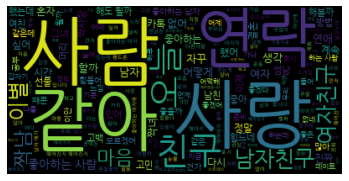

In [65]:
query_wordcloud = WordCloud(font_path= data_path + 'NanumGothic.ttf').generate(query_NVA_token)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

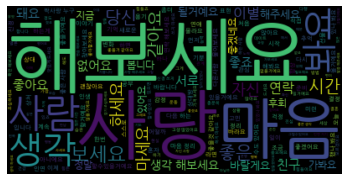

In [66]:
query_wordcloud = WordCloud(font_path= data_path + 'NanumGothic.ttf').generate(answer_NVA_token)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()